---
# ***Bank Fraud Detection and Analysis***
#### ***Using Machine Learning and Advanced Statistical Methods***
---
##### *By Daanish Muzaffar*
---
# **Objective**

This project focuses on **detecting fraudulent transactions** within a dataset of 2,500 records using a combination of **machine learning and statistical techniques**. It employs five distinct anomaly detection methods, aggregating their results to pinpoint high-risk transactions. The project is designed to deliver actionable insights through a comprehensive analysis, robust visualizations, and clear reporting.
After preprocessing the dataset (handling missing values, normalizing numeric features, and defining categorical columns), **univariate, bivariate, and multivariate analyses** were conducted to understand feature distributions and relationships. These analyses were visualized using appropriate graphs to provide clarity and context.

To detect fraud, five methodologies were employed:

1. **K-Means Clustering:** Identifies anomalies based on distance from centroids.
2. **Z-Score Analysis:** Flags extreme outliers in numeric features.
3. **DBSCAN Analysis:** Detects density-based anomalies as noise points.
4. **Logistic Regression:** Classifies transactions as fraud or non-fraud using supervised learning.
5. **Isolation Forest:** Highlights anomalous transactions using tree-based partitioning.

The results from these methods were consolidated into a **Threat Level** column, aggregating the number of fraud detections for each transaction. A higher threat level indicates a greater likelihood of fraud. To provide a prioritized view, the top 20 high-risk transactions were displayed in a color-coded threat chart. Additionally, the individual results for each method and the consolidated fraud list were saved in CSV format for further analysis.

This framework is scalable and can be integrated into real-time fraud detection systems, offering flexibility and efficiency for processing larger datasets.

*This model runs on Python 3.13 and performs best as a Jupyter Notebook.*

# **Load Data**
### Import suitable libraries. Fetch, scan and display relevant data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# Load the dataset
file_path = "/kaggle/input/bank-transaction-dataset-for-fraud-detection/bank_transactions_data_2.csv"
data = pd.read_csv(file_path)

# Display initial information about the dataset
print(data.head())      # Preview first few rows
print(data.info())      # Structure and types of data
print(data.describe())  # Summary statistics for numerical columns

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

# **Clean Data**
### Scan the dataset, check for missing values, fill in the missing values or delete them if too many NaN values

In [2]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Fill or drop missing values (example: fill missing numeric columns with median)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Handle categorical data (example: fill missing with mode)
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Convert date columns to datetime format (if applicable)
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Drop columns with too many missing values (optional)
numeric_data = numeric_data.dropna(axis=1, thresh=len(numeric_data) * 0.5)  # Keep columns with >50% non-NaN values

# Fill remaining missing values with median (optional)
numeric_data = numeric_data.fillna(numeric_data.median())

Missing values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


---
# **Exploratory Data Analysis (EDA)**
---

## **1. Univariate Analysis**
### Focus on analyzing a single feature at a time to understand its distribution, central tendency, and variability. Visualized with histograms, boxplots and countplots

Correlation Matrix:
                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000  


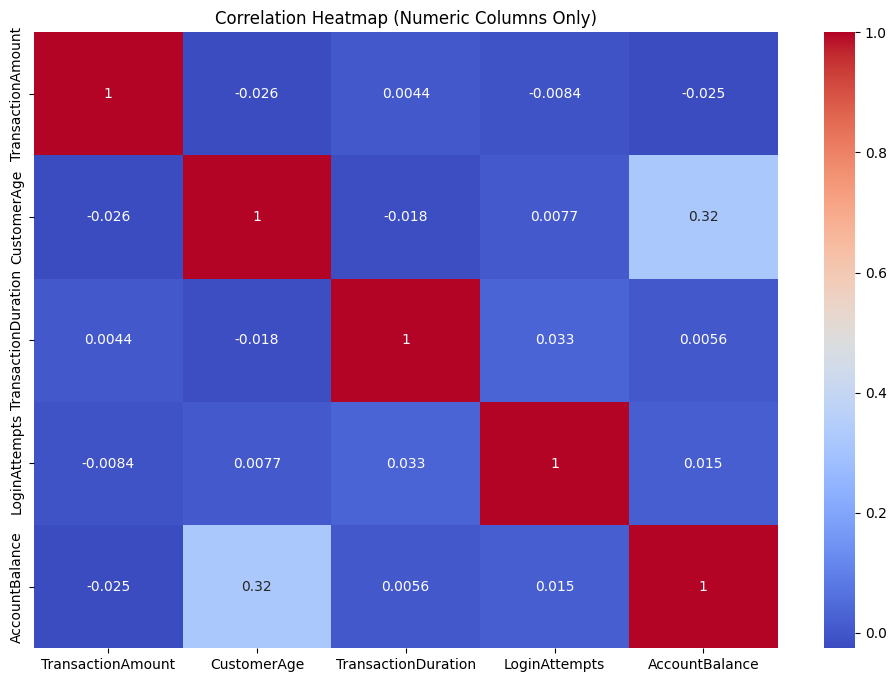

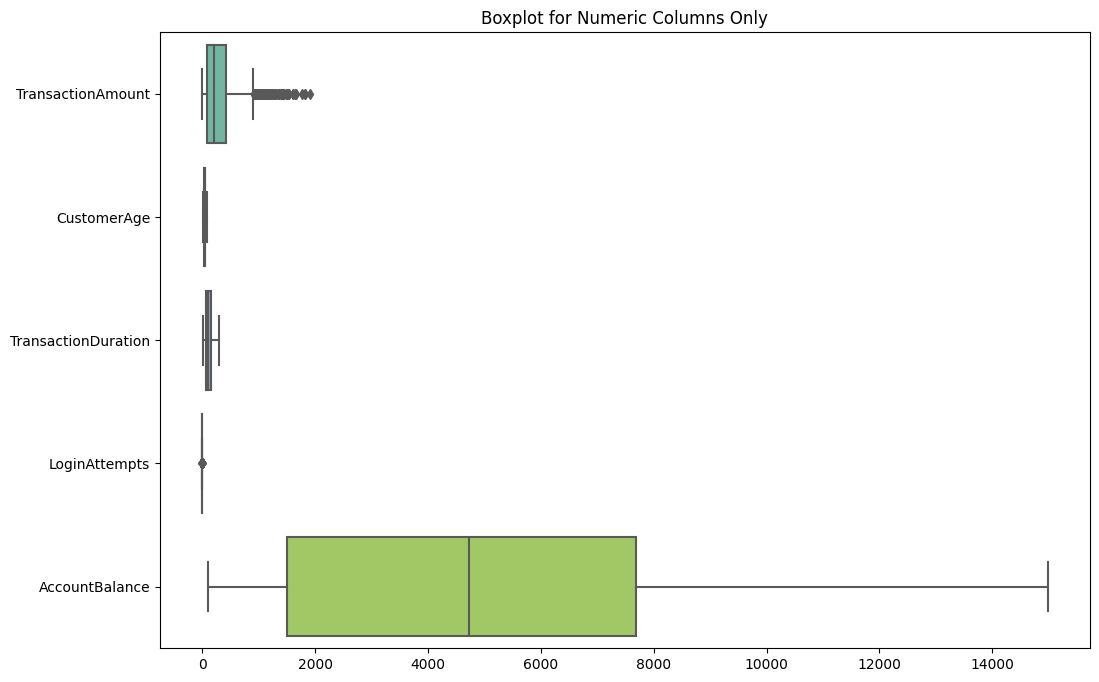

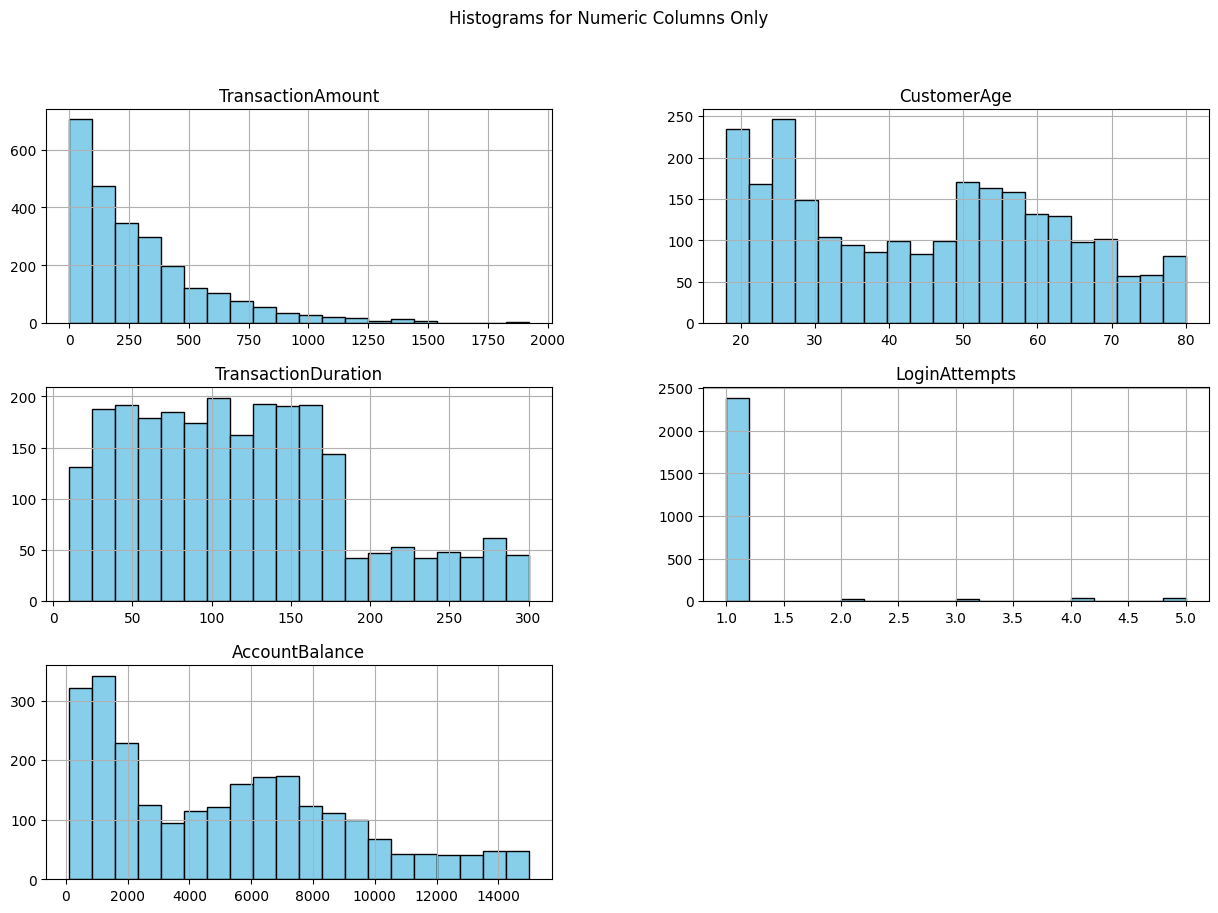

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


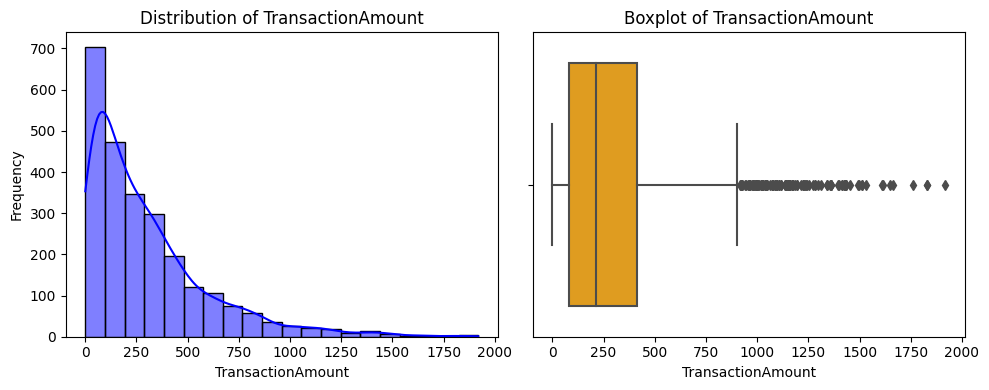

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


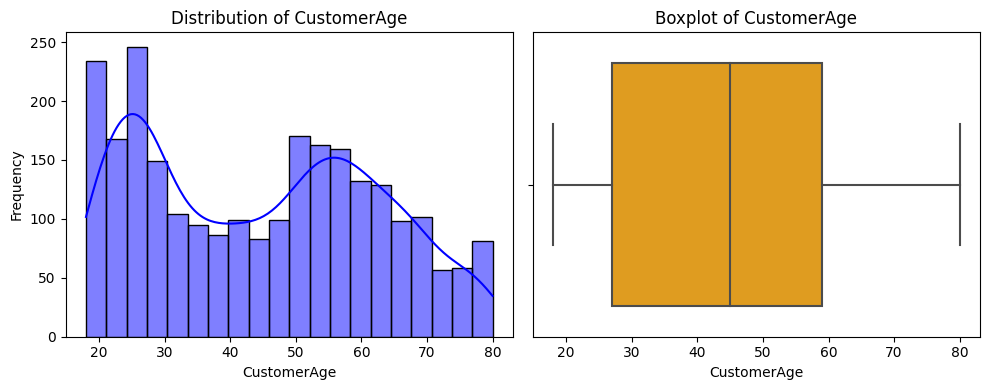

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


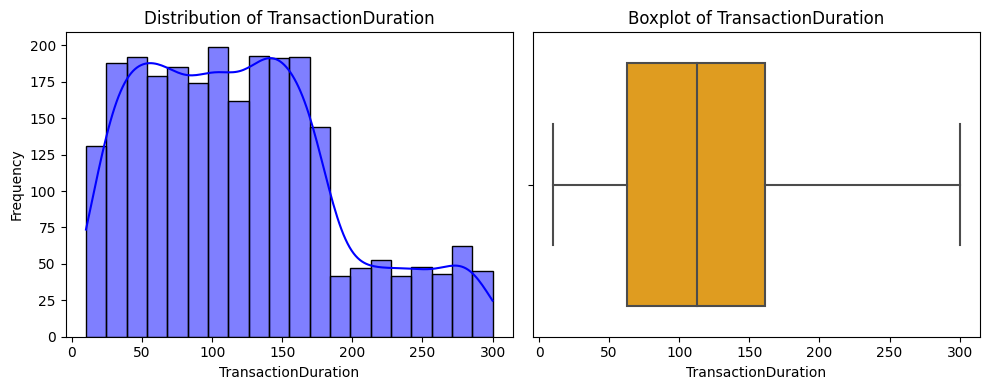

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


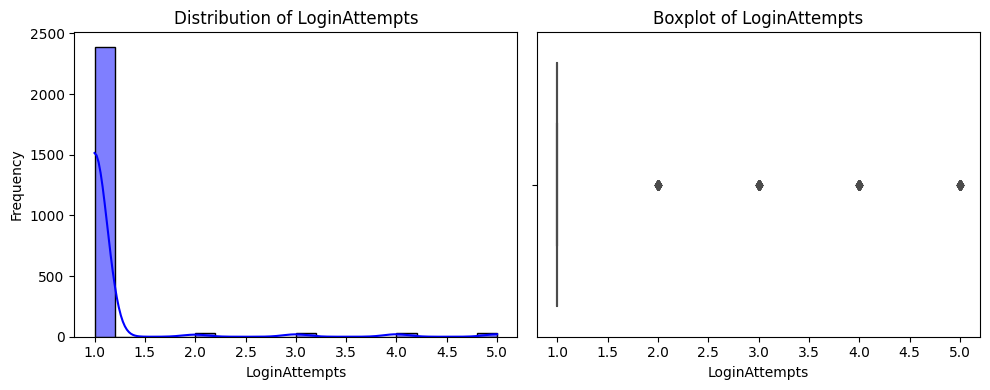

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


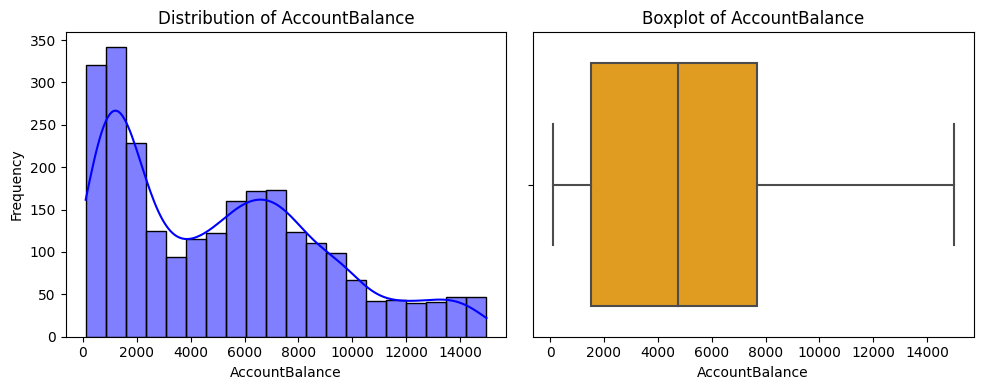

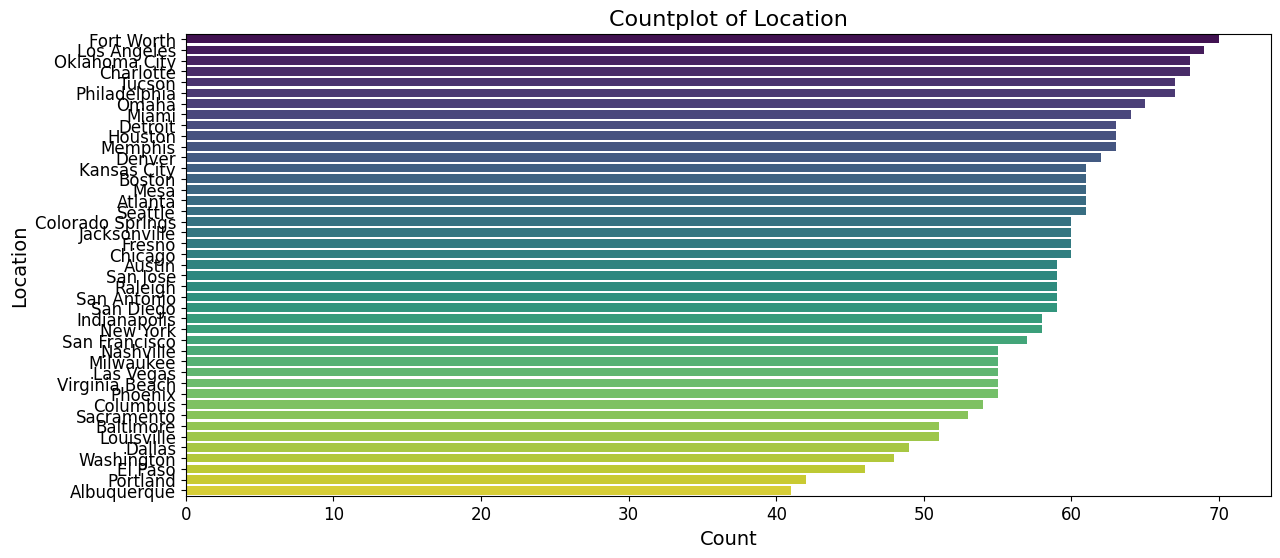

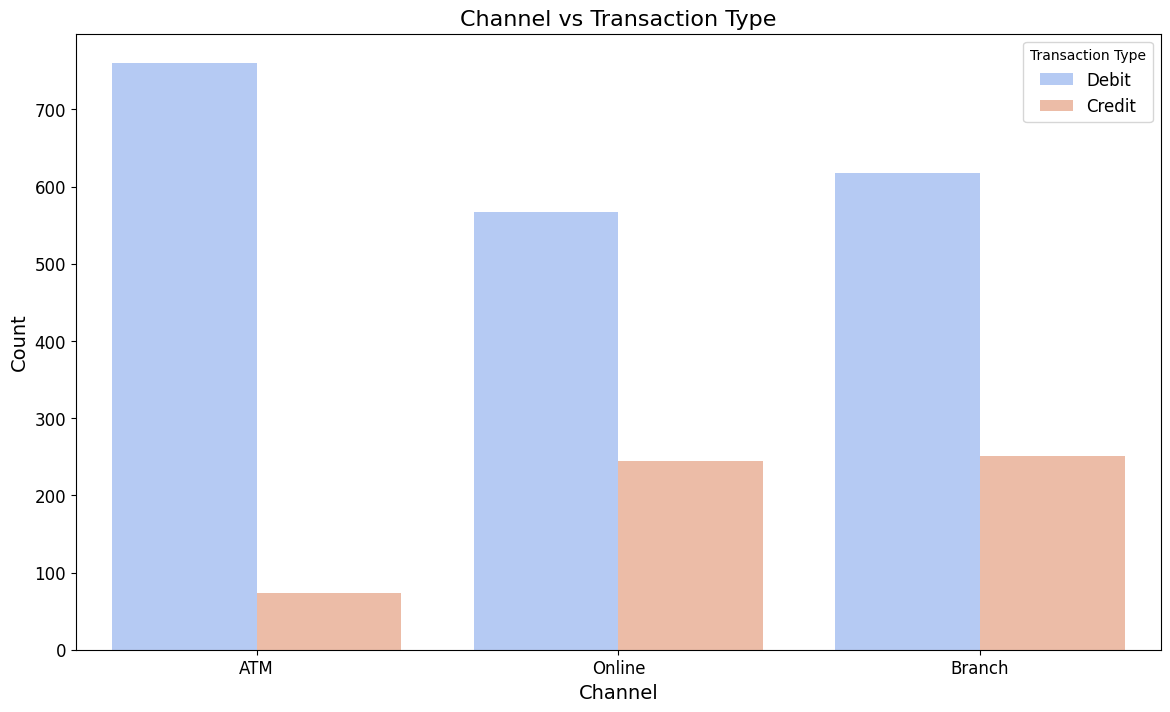

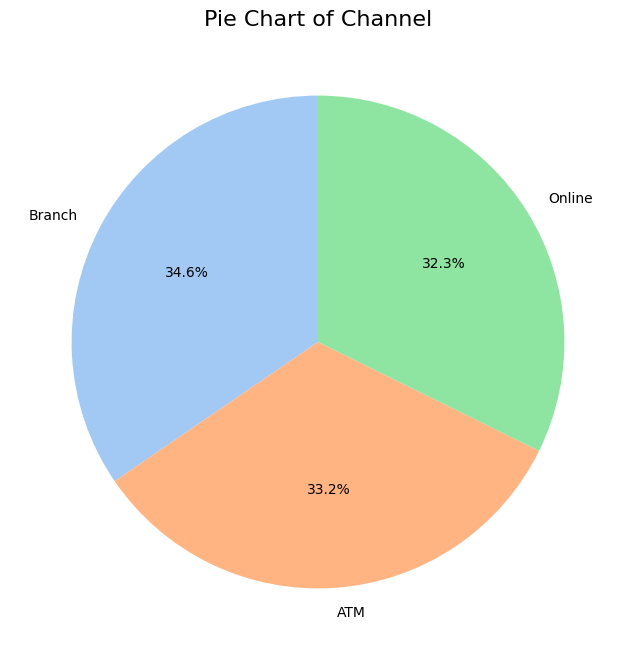

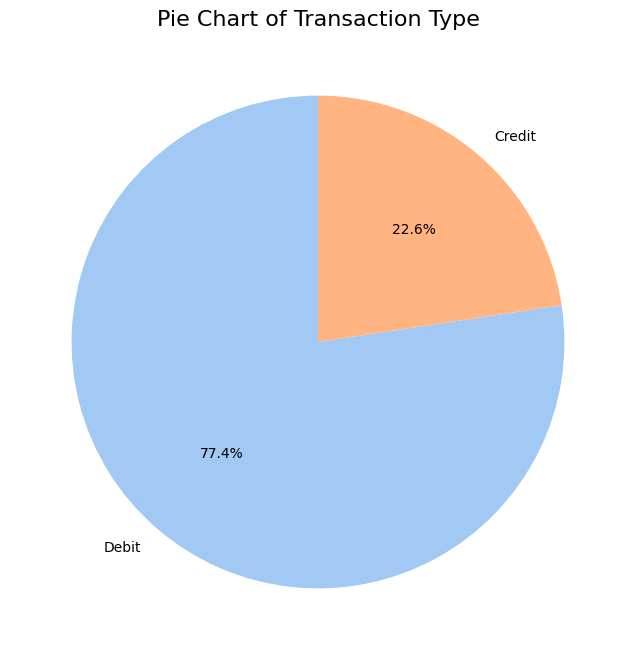

/tmp/ipykernel_27/2300882176.py:88: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CustomerOccupation', y='CustomerAge', data=data, estimator='mean', palette='muted', ci=None)


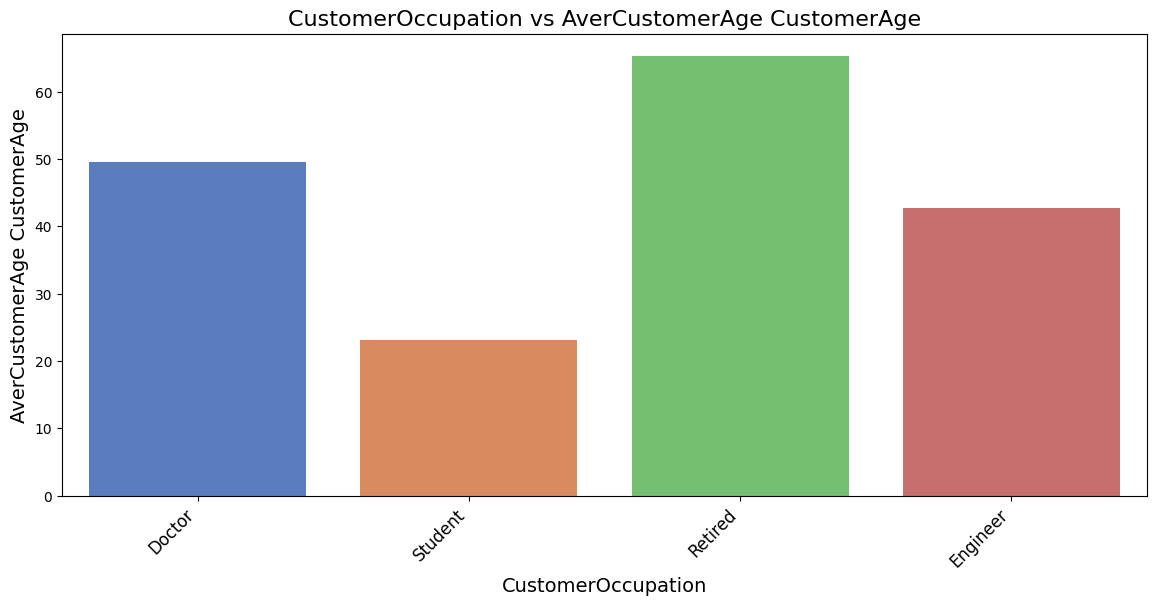

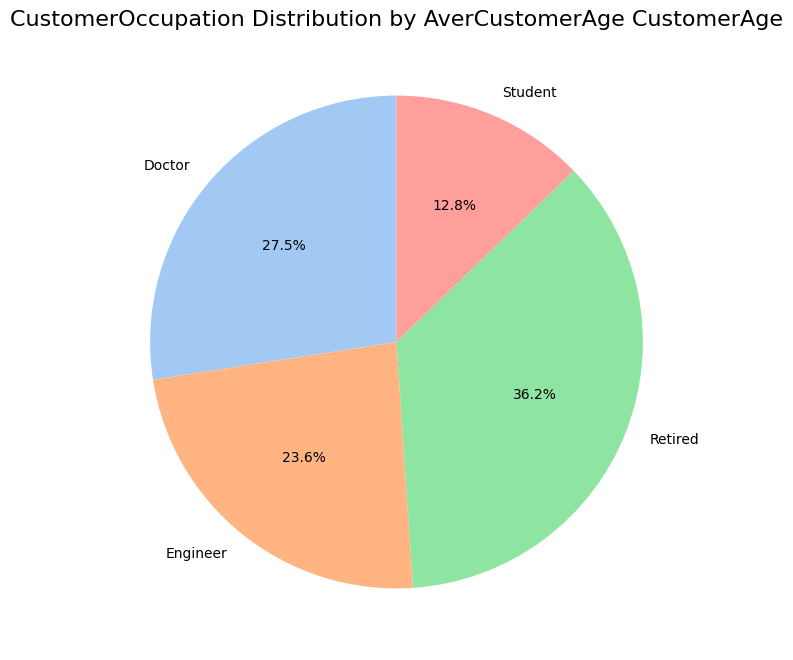

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


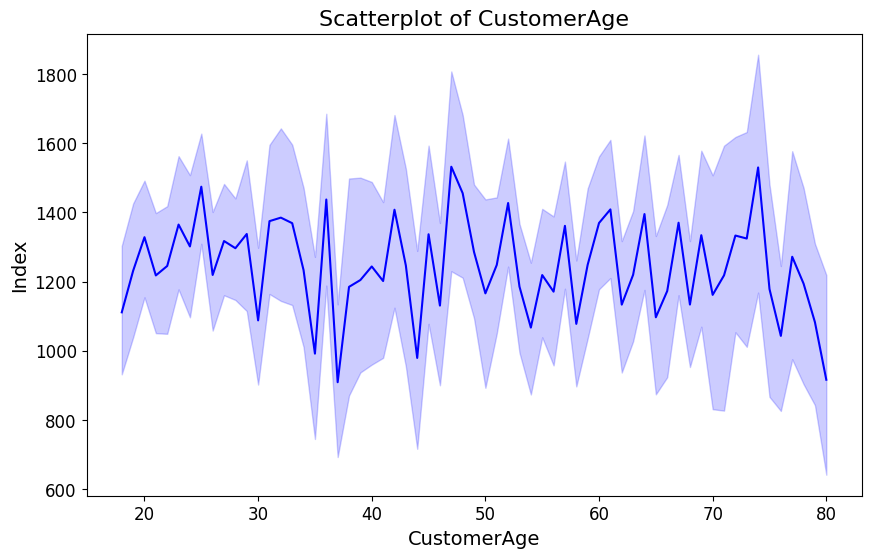

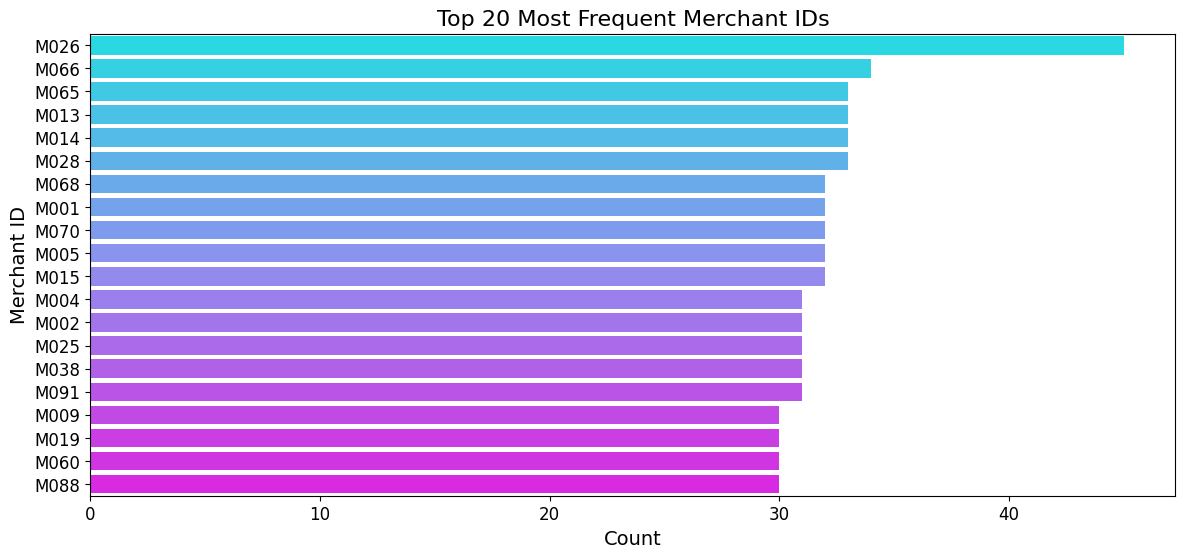

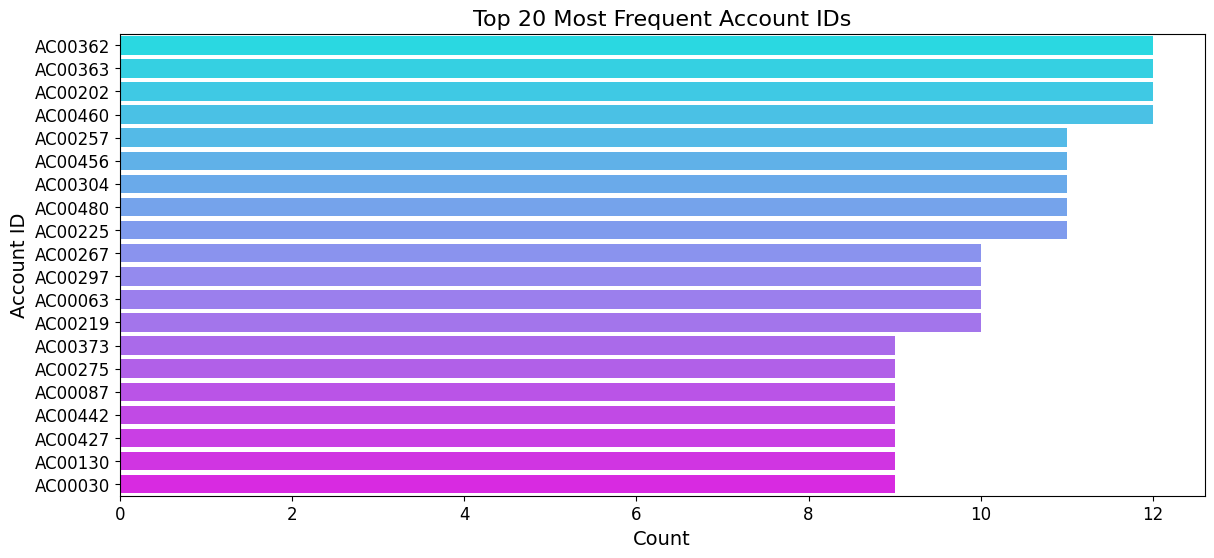

In [3]:
# Compute the correlation matrix for numeric data only
correlation_matrix = numeric_data.corr()

# Verify the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

# Additional: Boxplot for numeric columns only
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_data, orient="h", palette="Set2")
plt.title('Boxplot for Numeric Columns Only')
plt.show()

# Additional: Histograms for numeric columns only
numeric_data.hist(figsize=(15, 10), bins=20, edgecolor='black', color='skyblue')
plt.suptitle('Histograms for Numeric Columns Only')
plt.show()

# Step 1: Identify numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Step 2: Plot univariate graphs
# For numeric columns: Histograms and Boxplots
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=20, color='blue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

# For categorical columns: Countplots
# Countplot for 'location'
plt.figure(figsize=(14, 6))
sns.countplot(y=data['Location'], order=data['Location'].value_counts().index, palette='viridis')
plt.title('Countplot of Location', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Double bar graph for 'Channel' and 'TransactionType'
plt.figure(figsize=(14, 8))
sns.countplot(x='Channel', hue='TransactionType', data=data, palette='coolwarm')
plt.title('Channel vs Transaction Type', fontsize=16)
plt.xlabel('Channel', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Transaction Type', fontsize=12)
plt.show()

# Pie chart for 'Channel'
plt.figure(figsize=(8, 8))
data['Channel'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Channel', fontsize=16)
plt.ylabel('')  # Remove default y-axis label
plt.show()

# Pie chart for 'TransactionType'
plt.figure(figsize=(8, 8))
data['TransactionType'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Transaction Type', fontsize=16)
plt.ylabel('')  # Remove default y-axis label
plt.show()

# Bar graph and pie chart for 'CustomerOccupation' with respect to 'CustomerAge'
plt.figure(figsize=(14, 6))
sns.barplot(x='CustomerOccupation', y='CustomerAge', data=data, estimator='mean', palette='muted', ci=None)
plt.title('CustomerOccupation vs AverCustomerAge CustomerAge', fontsize=16)
plt.xlabel('CustomerOccupation', fontsize=14)
plt.ylabel('AverCustomerAge CustomerAge', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.show()

# Pie chart for 'CustomerOccupation' with respect to 'CustomerAge'
plt.figure(figsize=(8, 8))
data.groupby('CustomerOccupation')['CustomerAge'].mean().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('CustomerOccupation Distribution by AverCustomerAge CustomerAge', fontsize=16)
plt.ylabel('')  # Remove default y-axis label
plt.show()

# Scatterplot for 'CustomerAge'
plt.figure(figsize=(10, 6))
sns.lineplot(y=data.index, x=data['CustomerAge'], color='blue')
plt.title('Scatterplot of CustomerAge', fontsize=16)
plt.ylabel('Index', fontsize=14)
plt.xlabel('CustomerAge', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

# Countplot for top 20 most frequent 'MerchantID'
top_20_merchants = data['MerchantID'].value_counts().head(20).index
plt.figure(figsize=(14, 6))
sns.countplot(y=data[data['MerchantID'].isin(top_20_merchants)]['MerchantID'], order=top_20_merchants, palette='cool')
plt.title('Top 20 Most Frequent Merchant IDs', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Merchant ID', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Countplot for top 20 most frequent 'AccountID'
top_20_accounts = data['AccountID'].value_counts().head(20).index
plt.figure(figsize=(14, 6))
sns.countplot(y=data[data['AccountID'].isin(top_20_accounts)]['AccountID'], order=top_20_accounts, palette='cool')
plt.title('Top 20 Most Frequent Account IDs', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Account ID', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## **2. Bivariate Analysis**
### Examines the relationship between two variables, using scatterplots, correlation matrices, or cross-tabulations to identify patterns or associations.

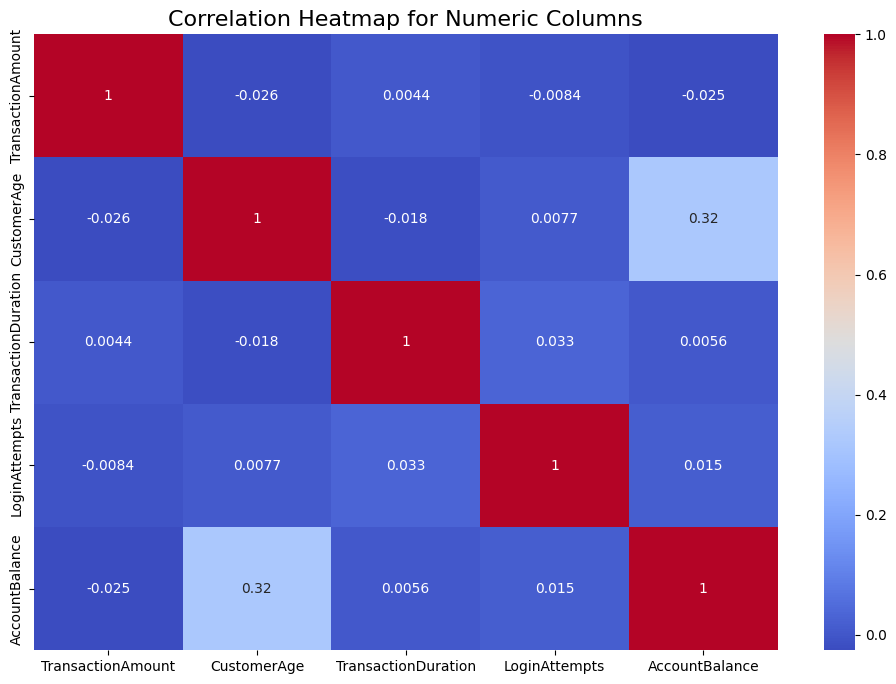

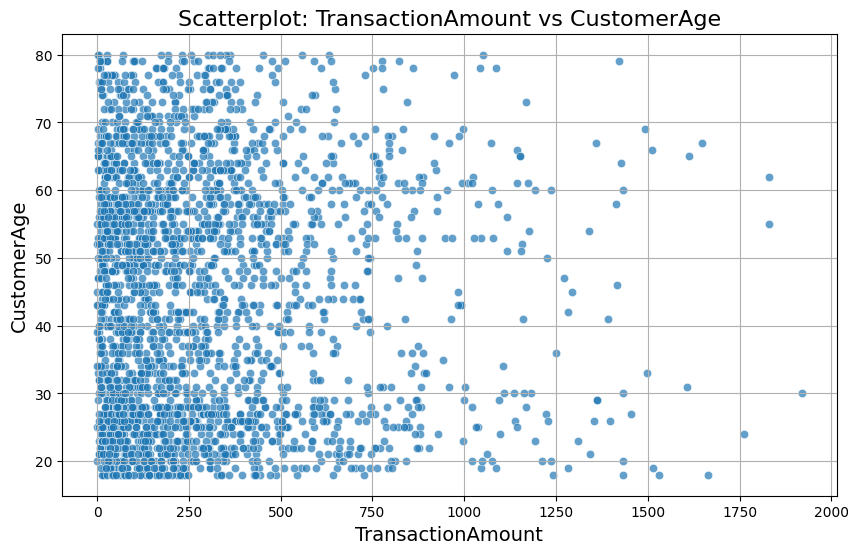

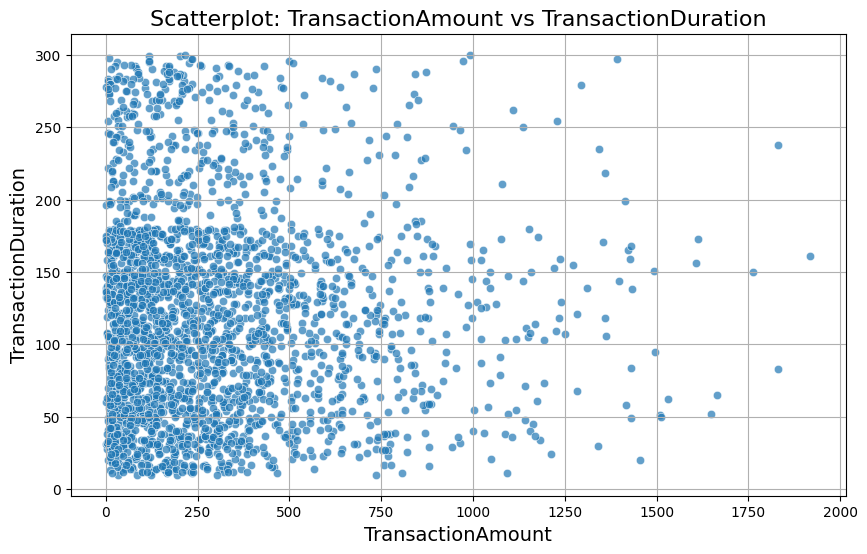

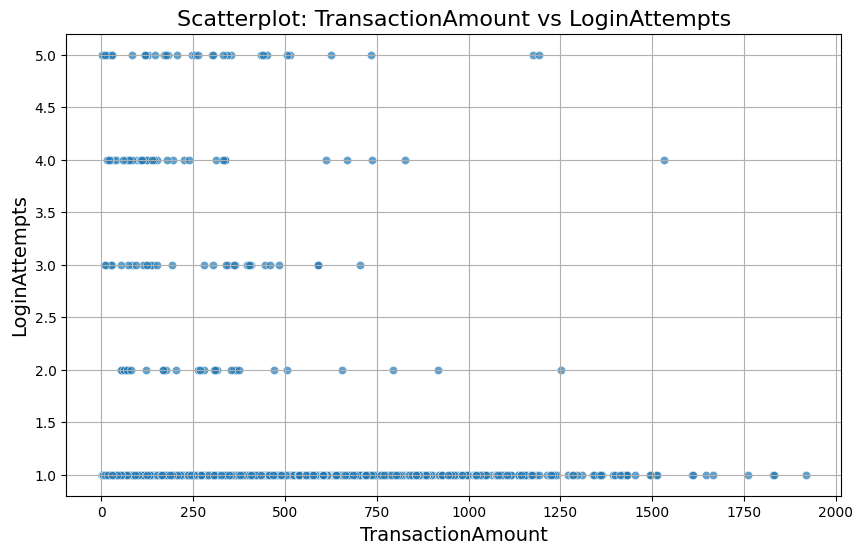

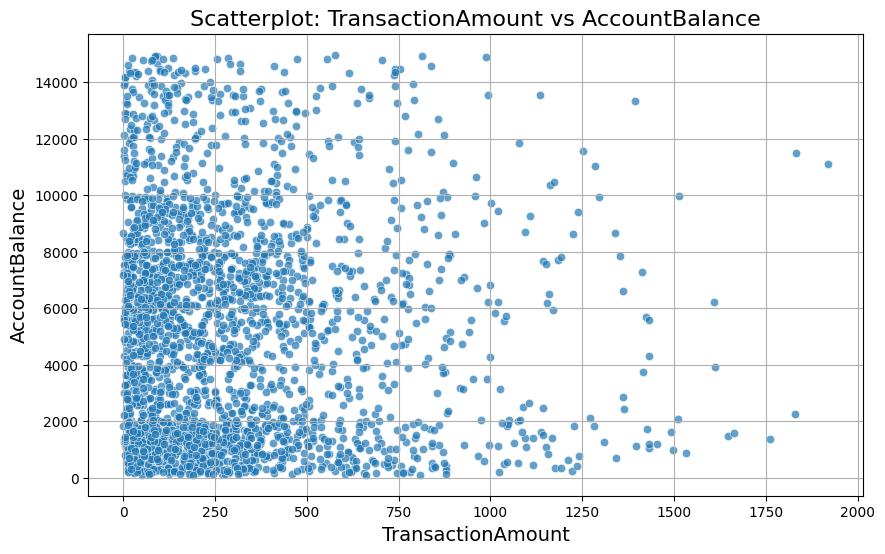

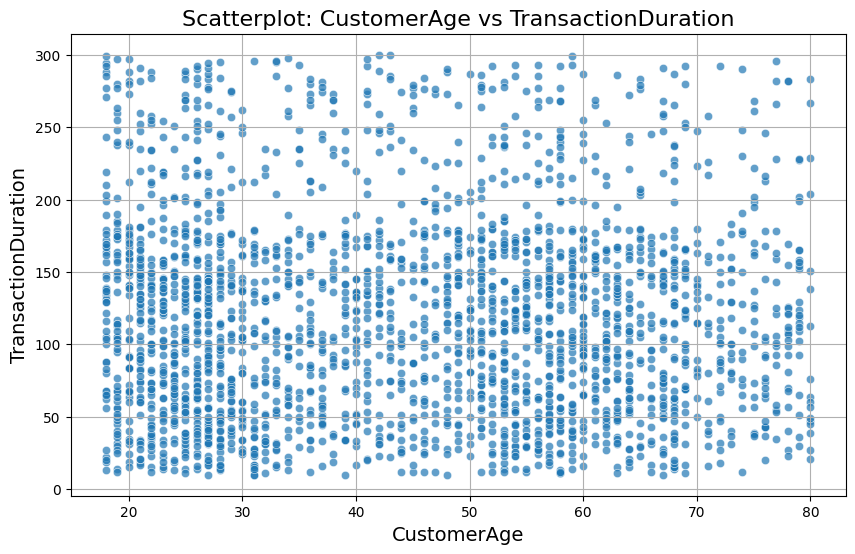

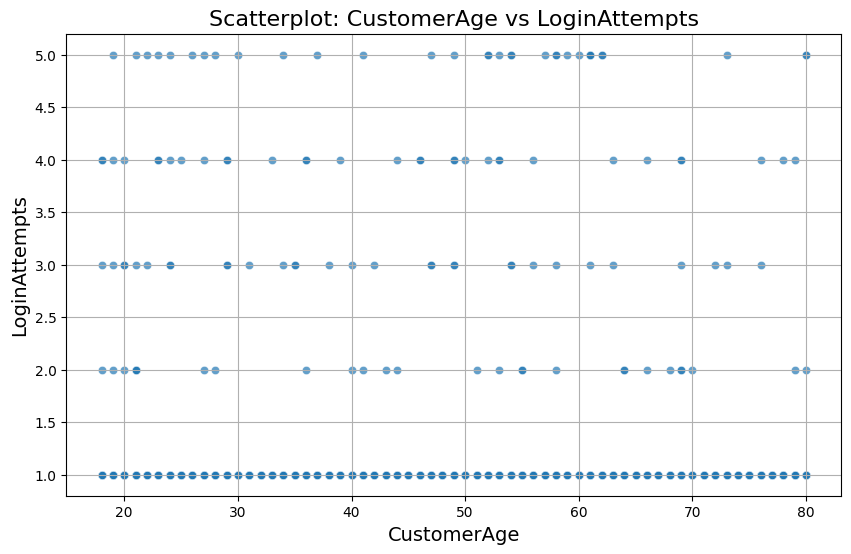

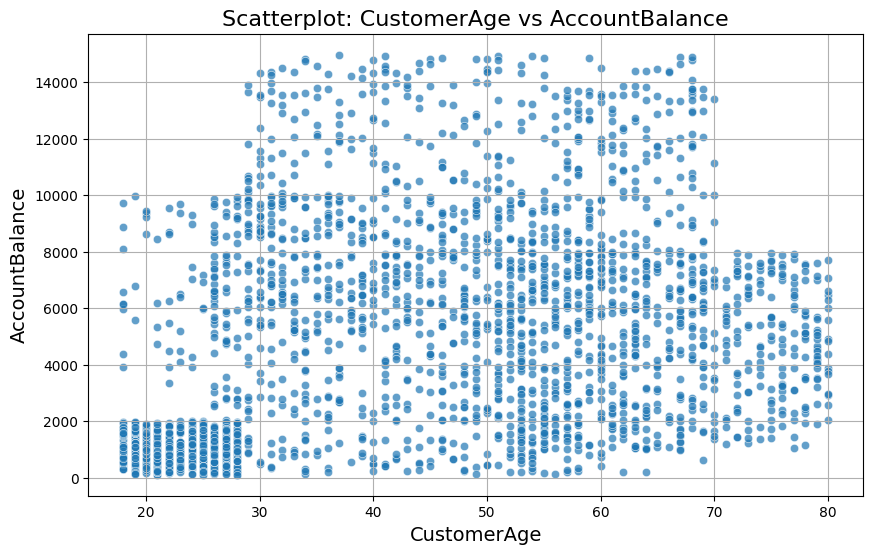

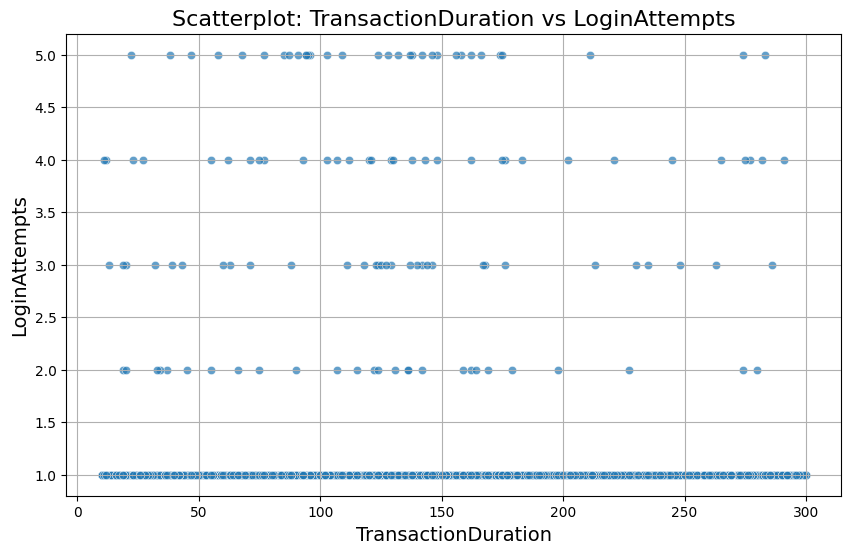

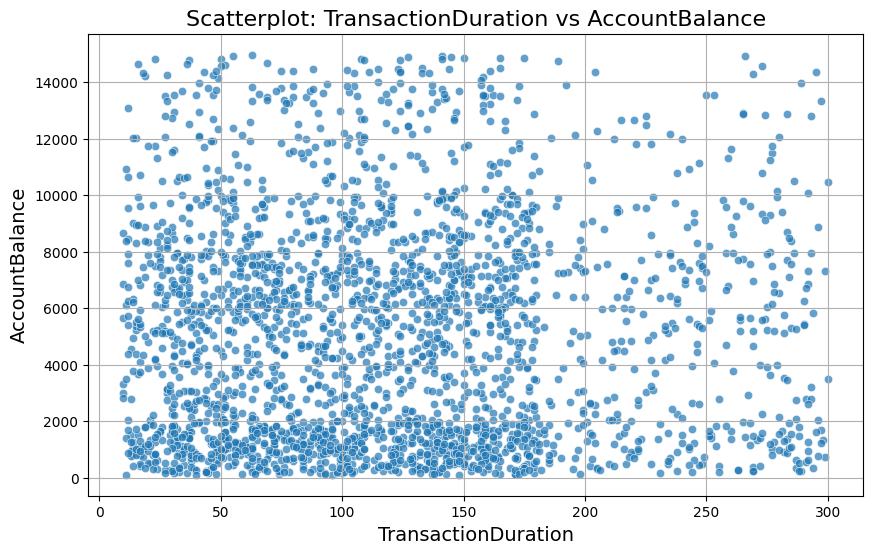

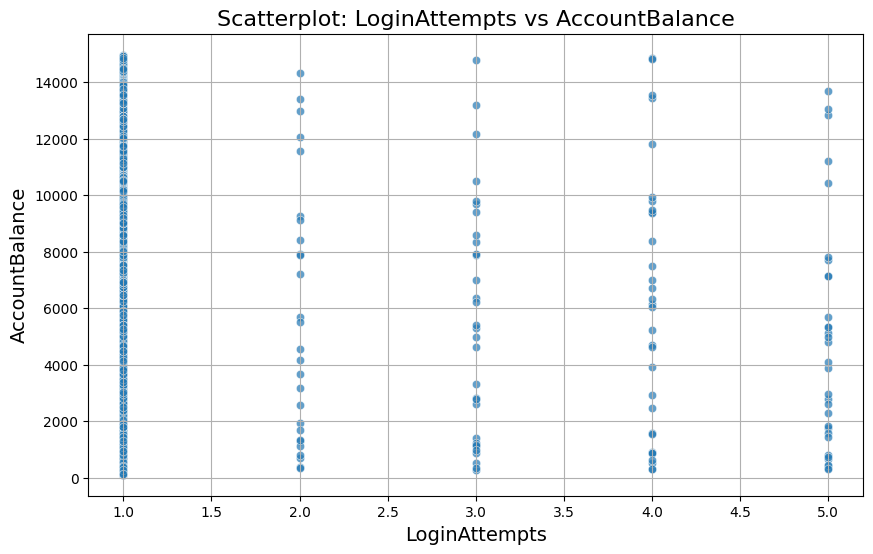

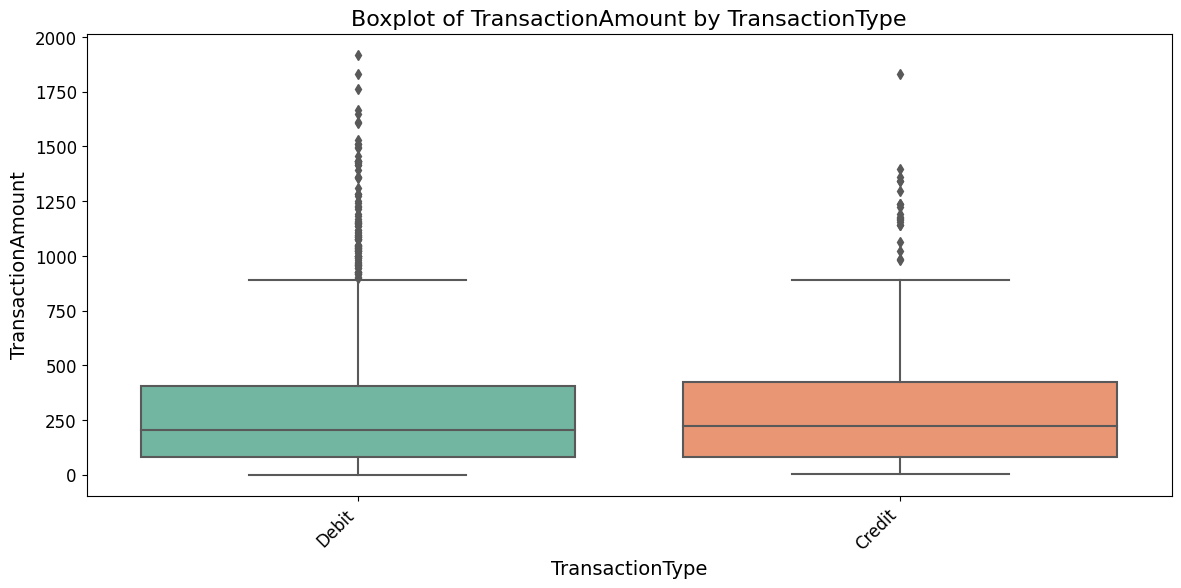

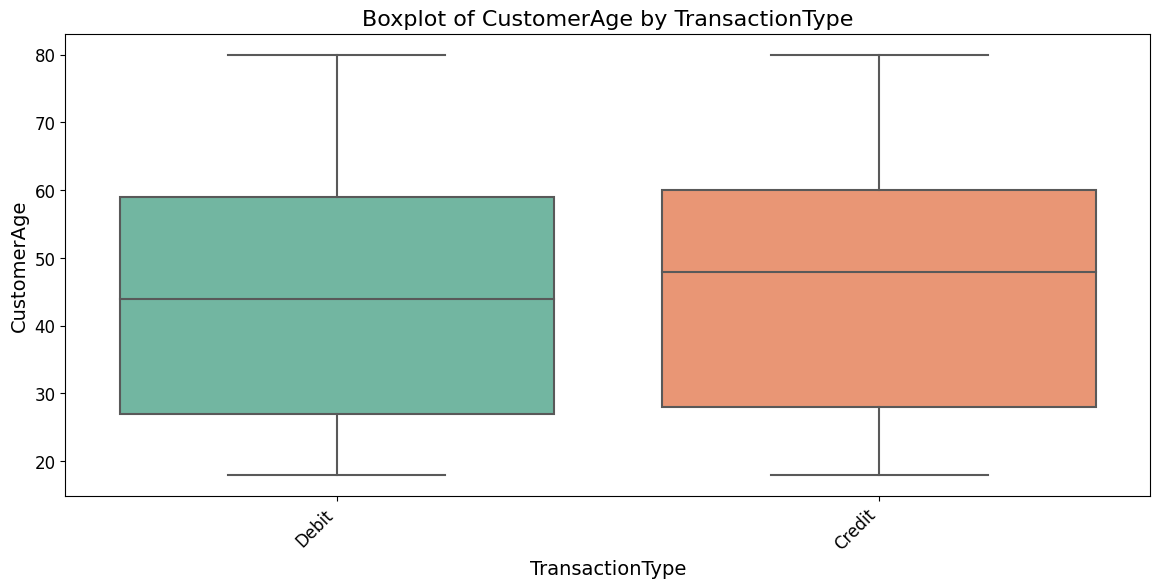

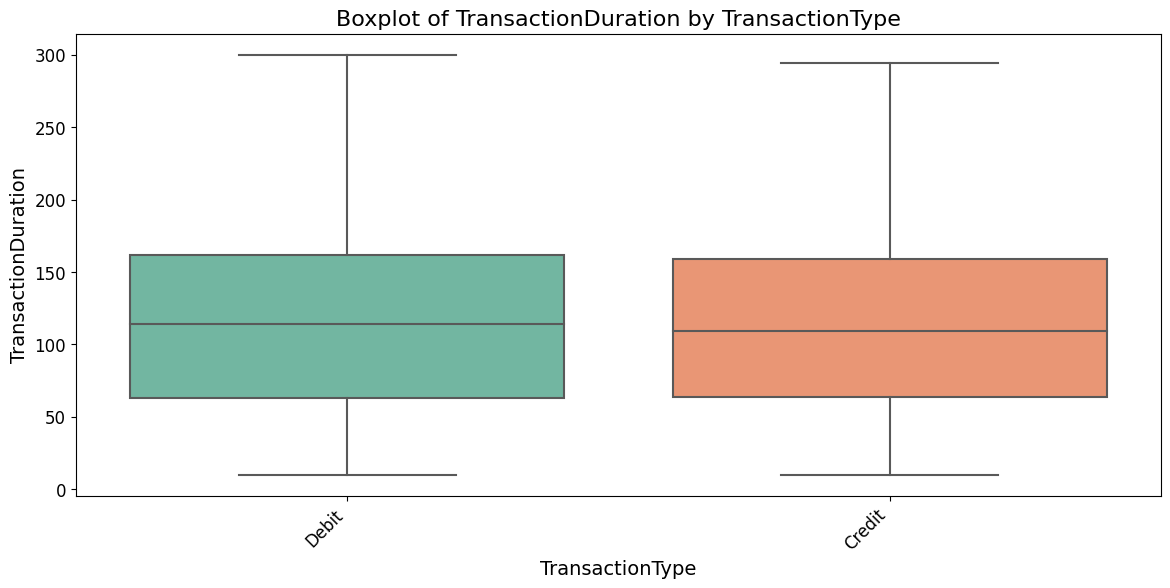

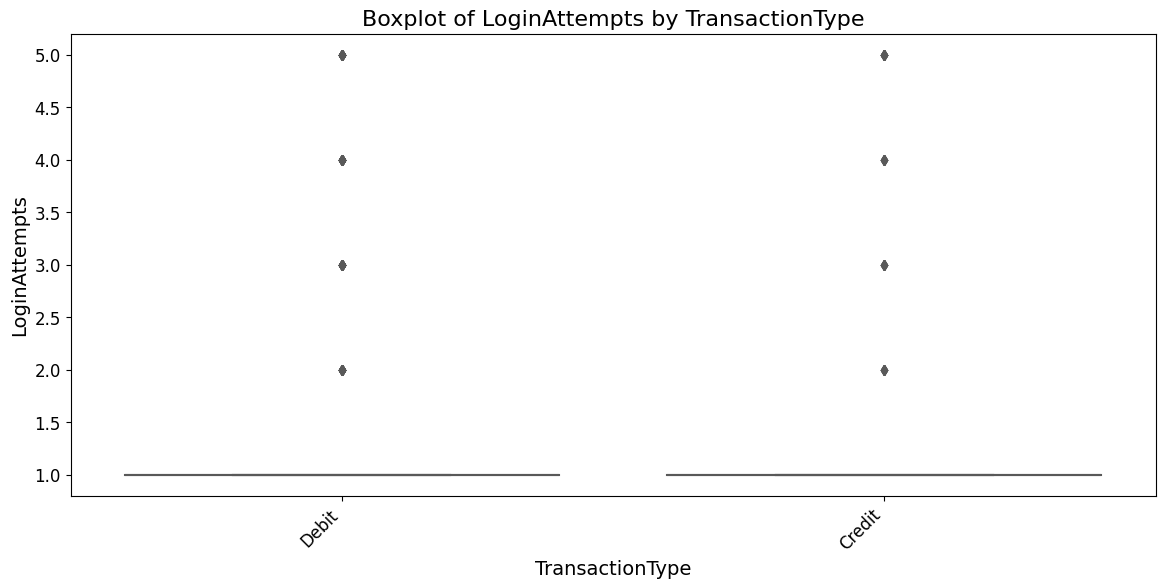

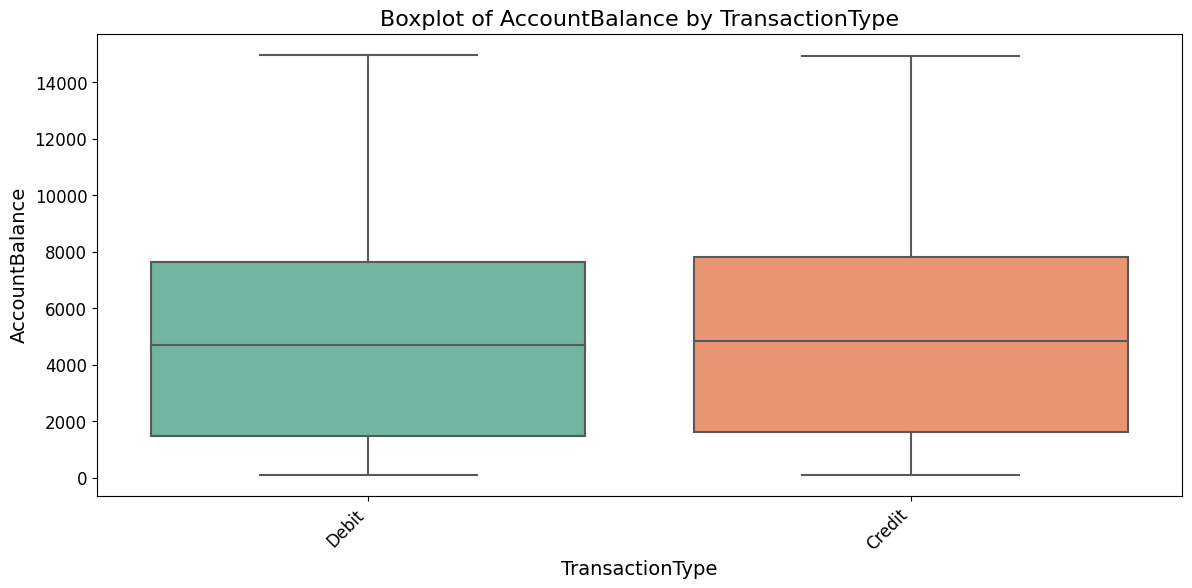

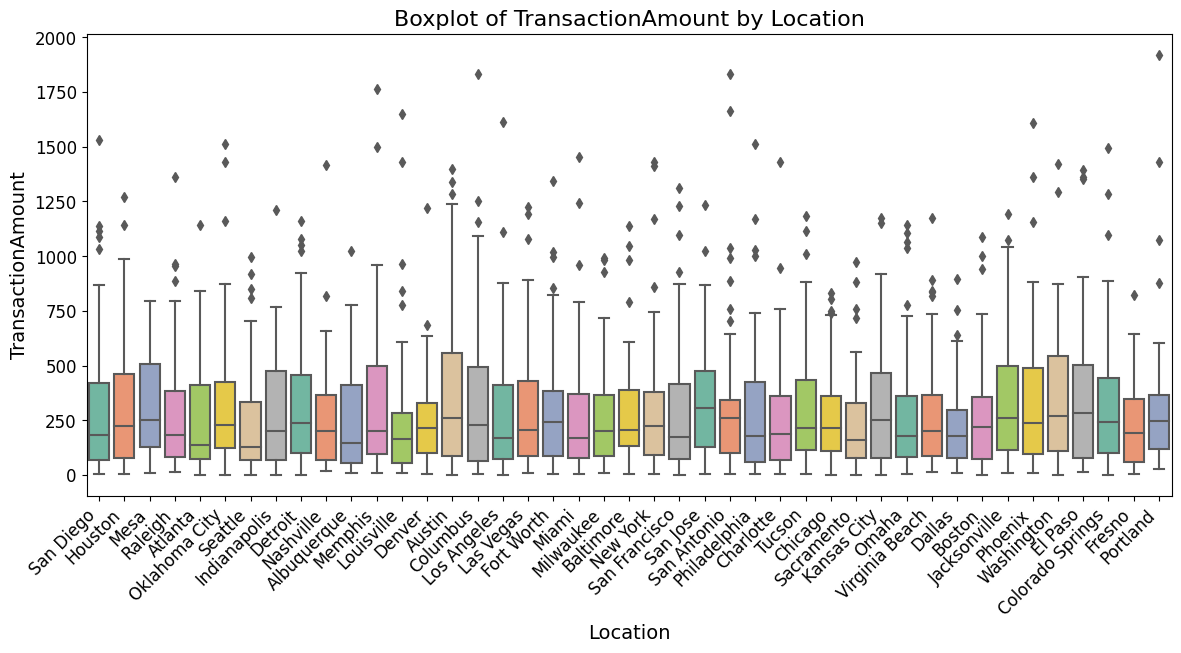

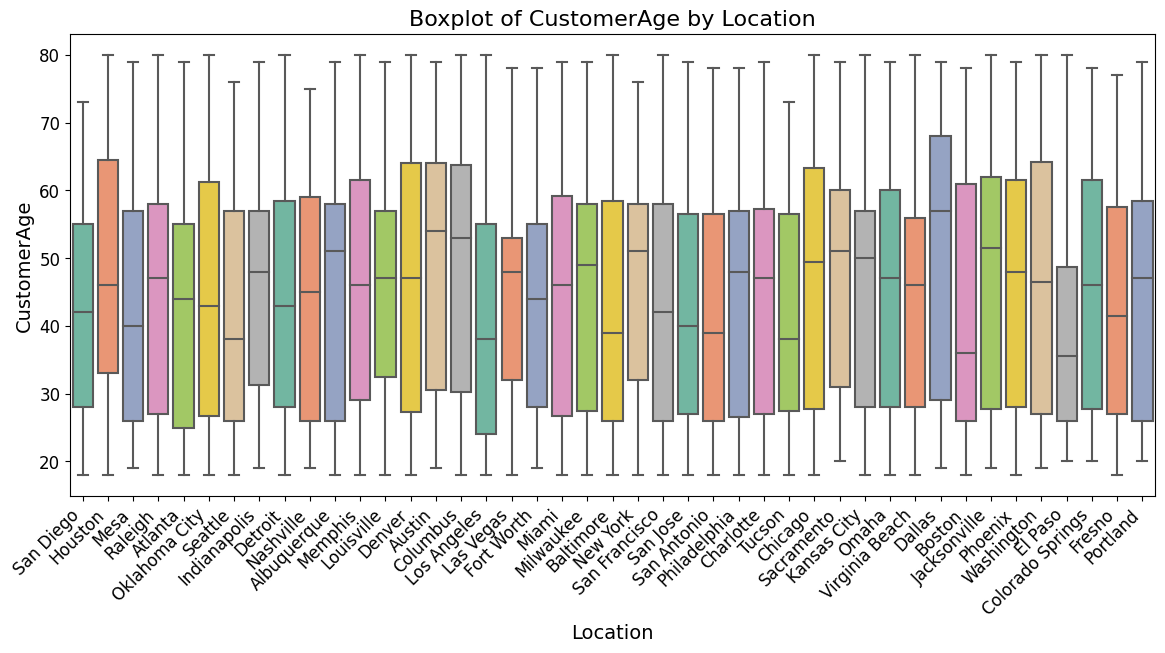

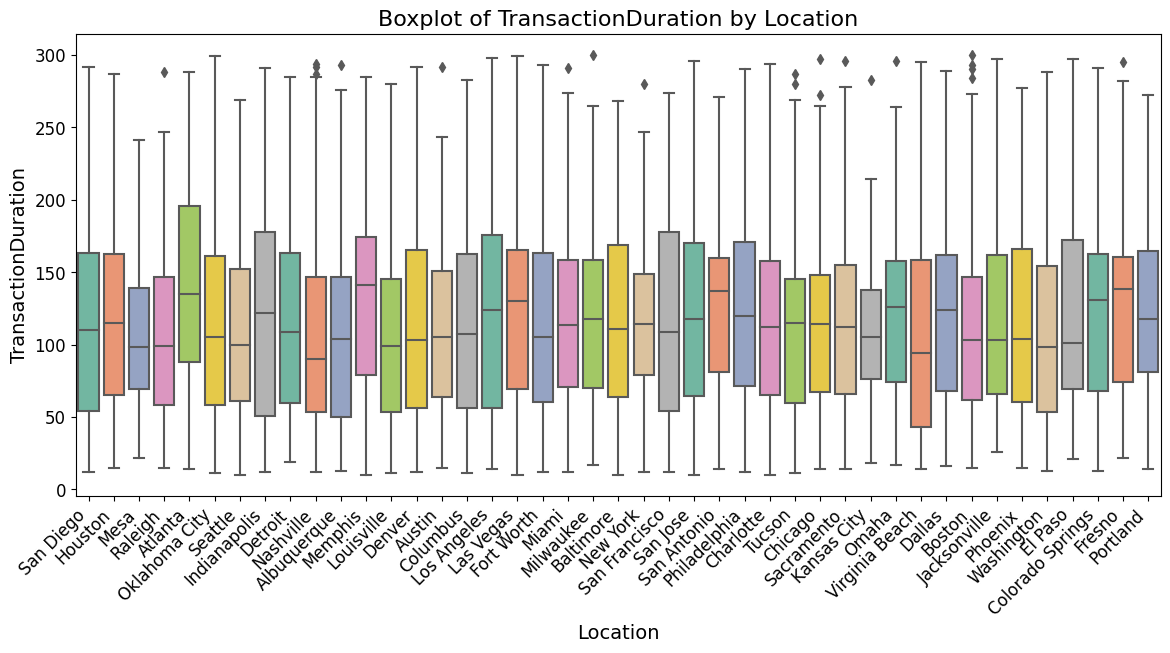

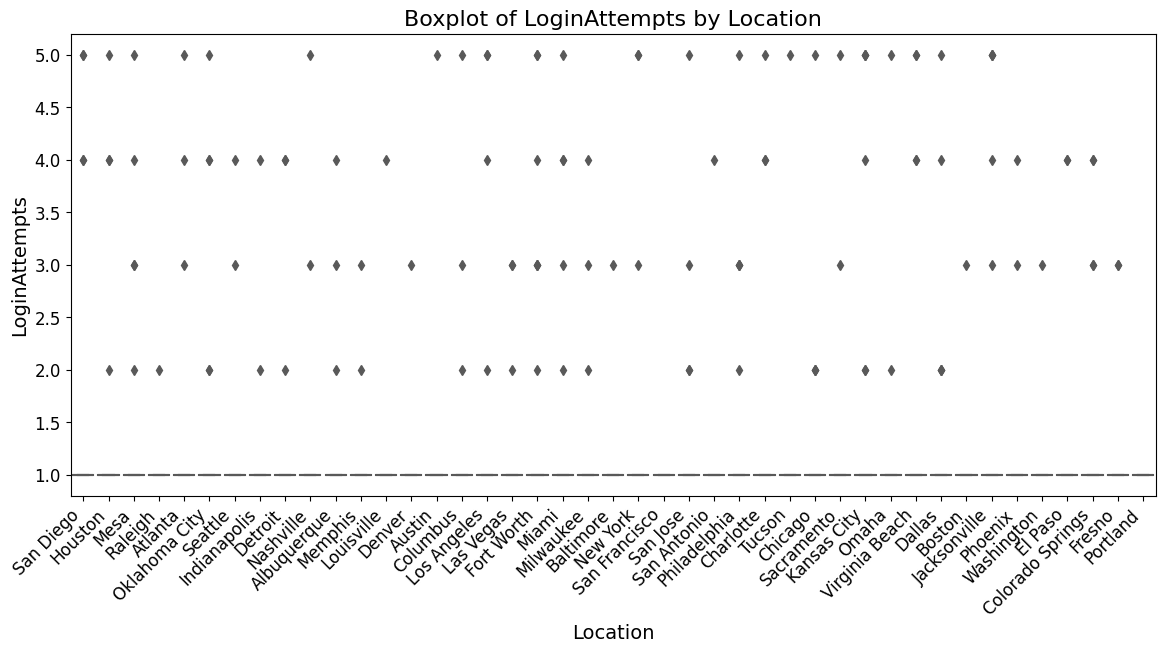

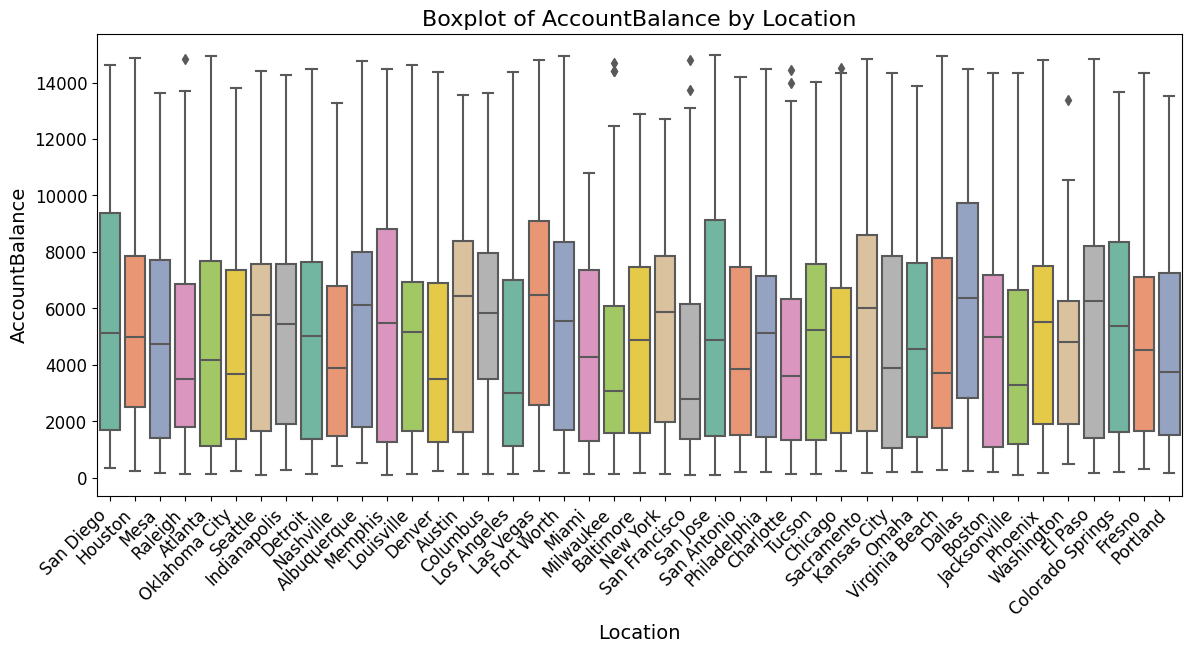

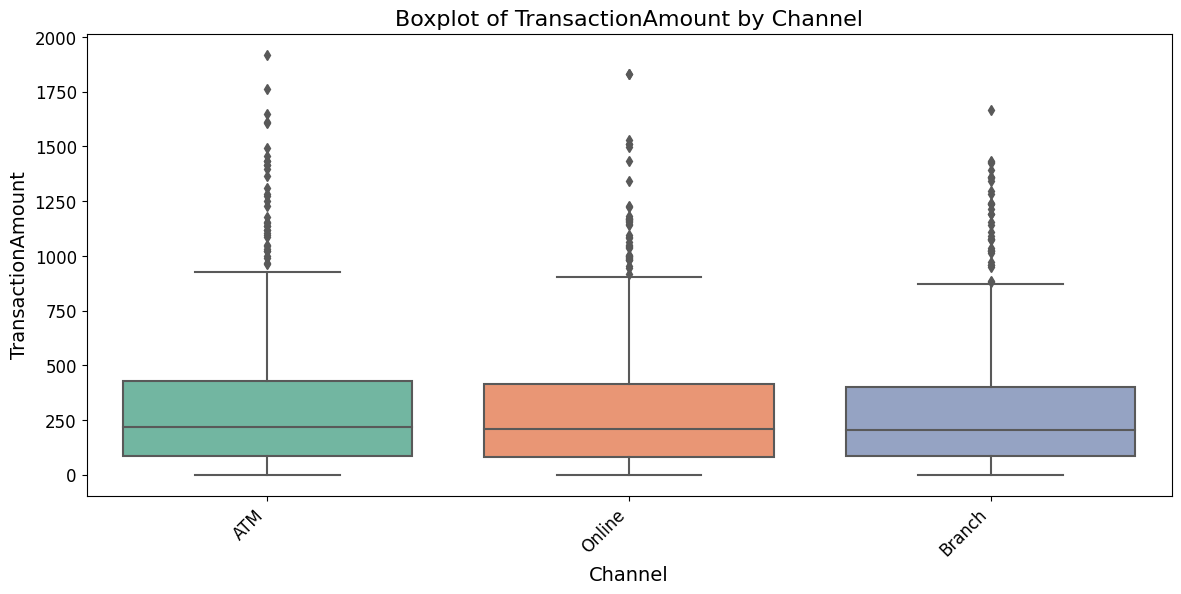

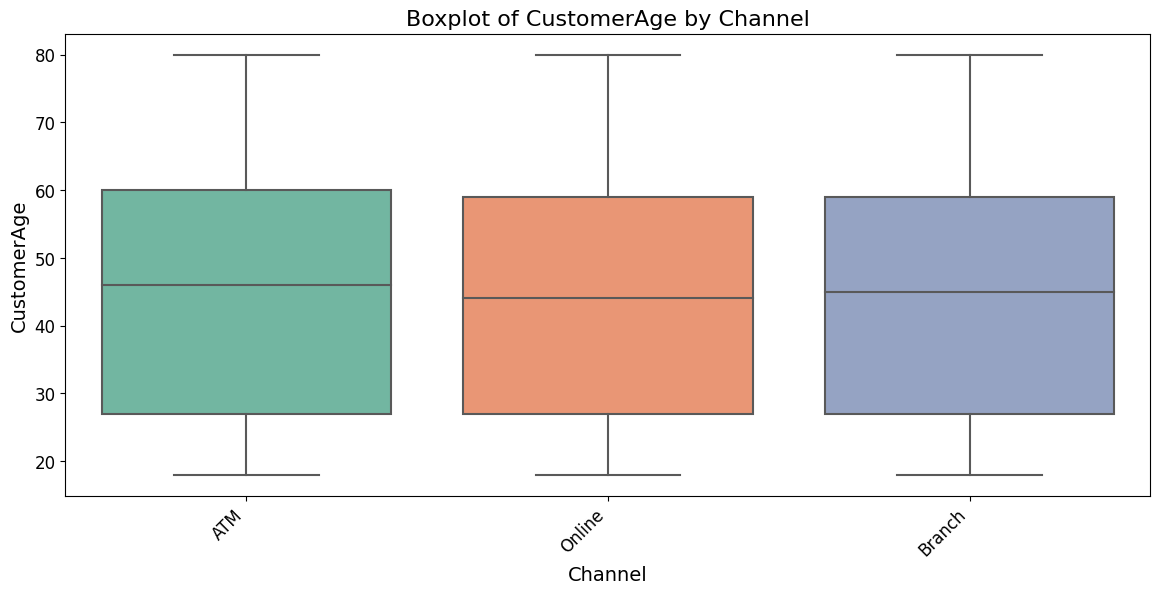

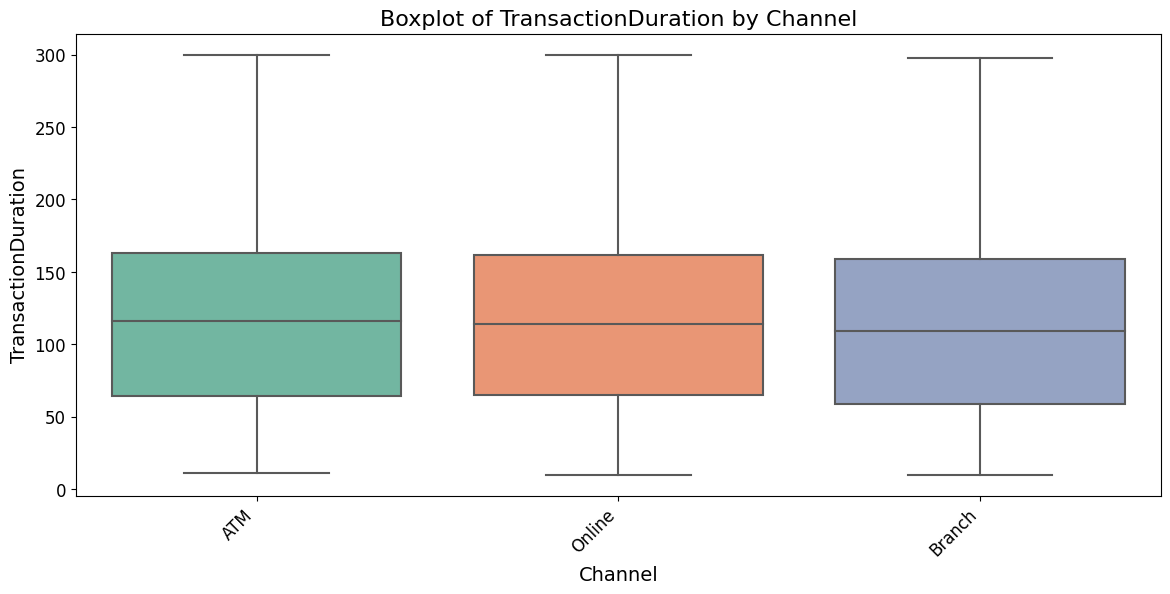

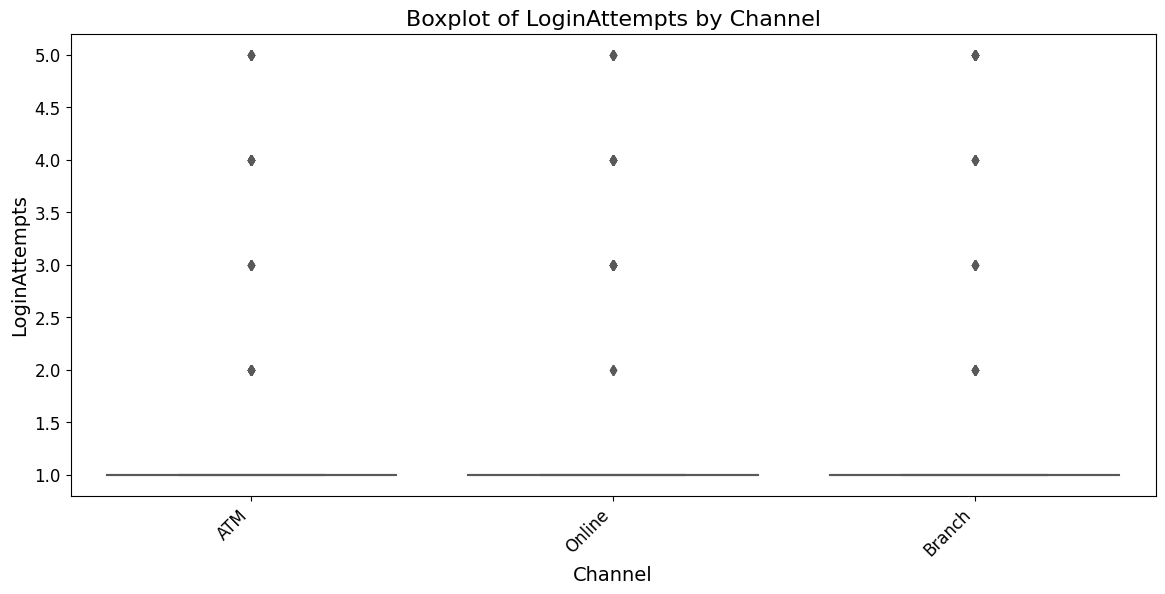

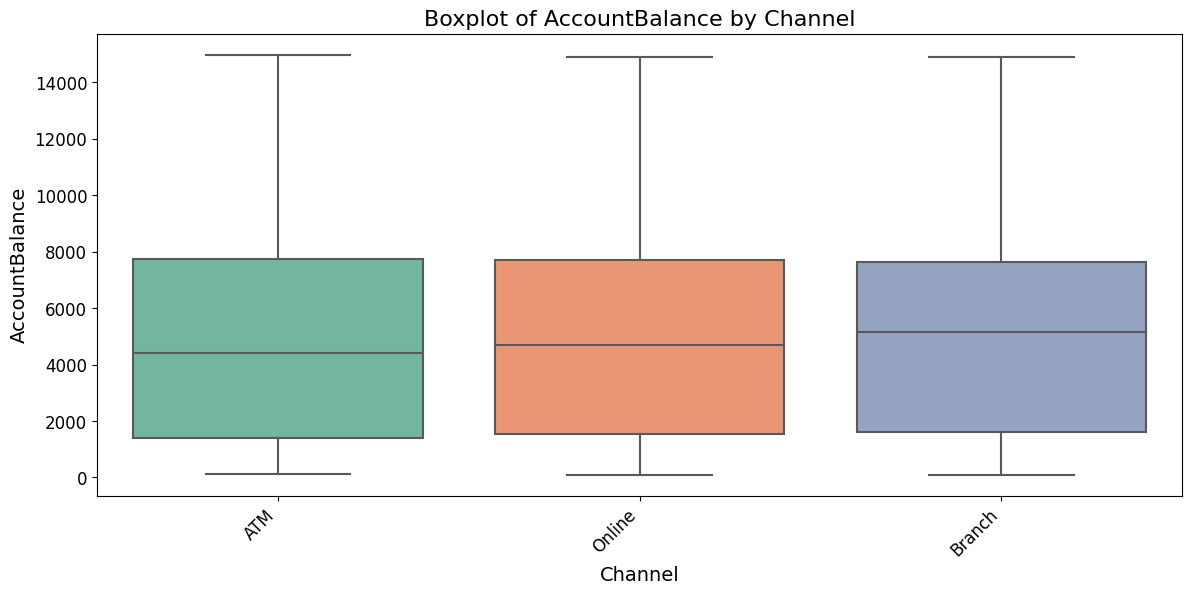

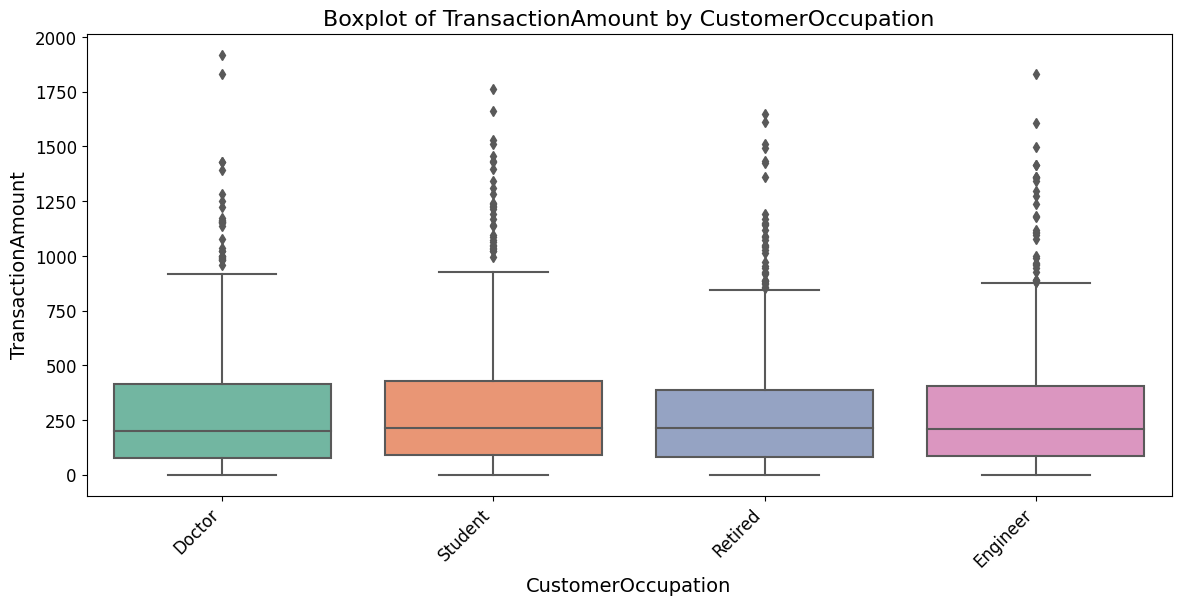

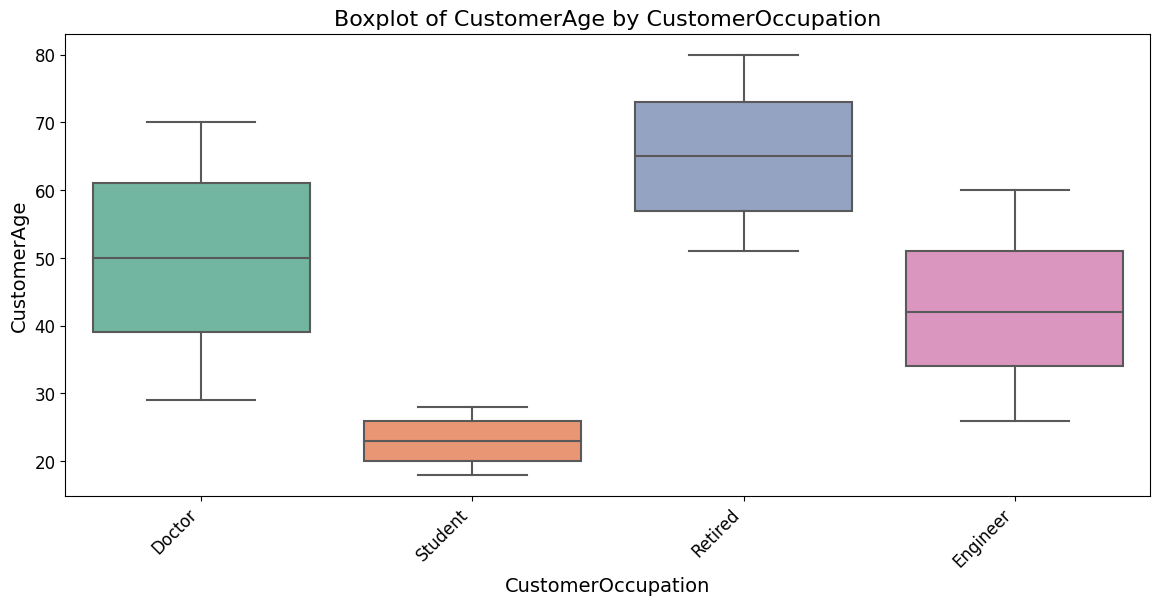

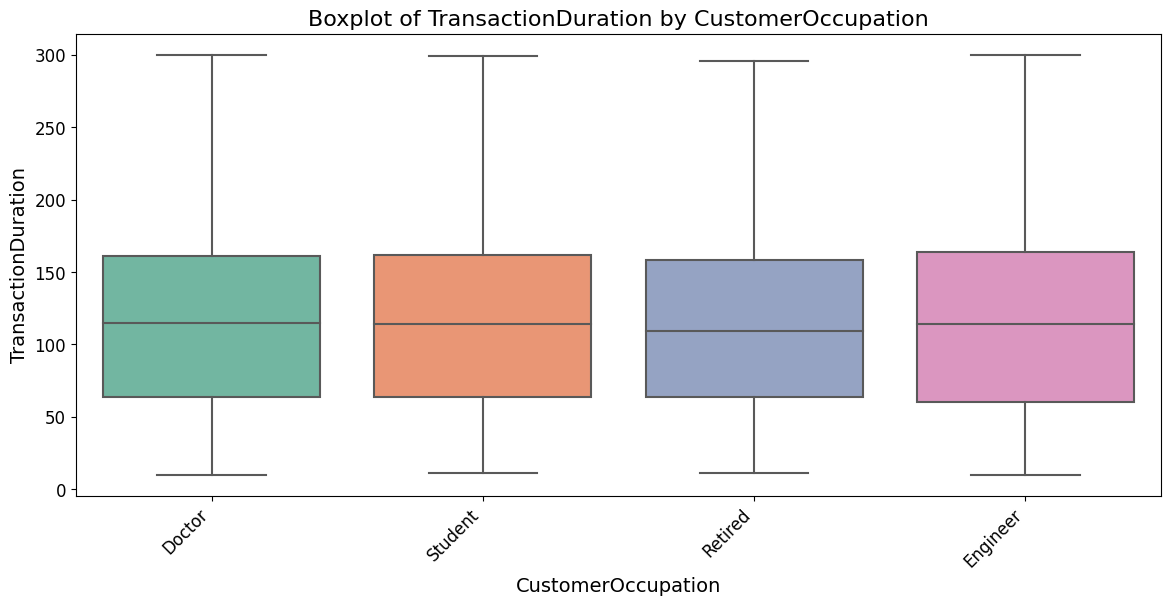

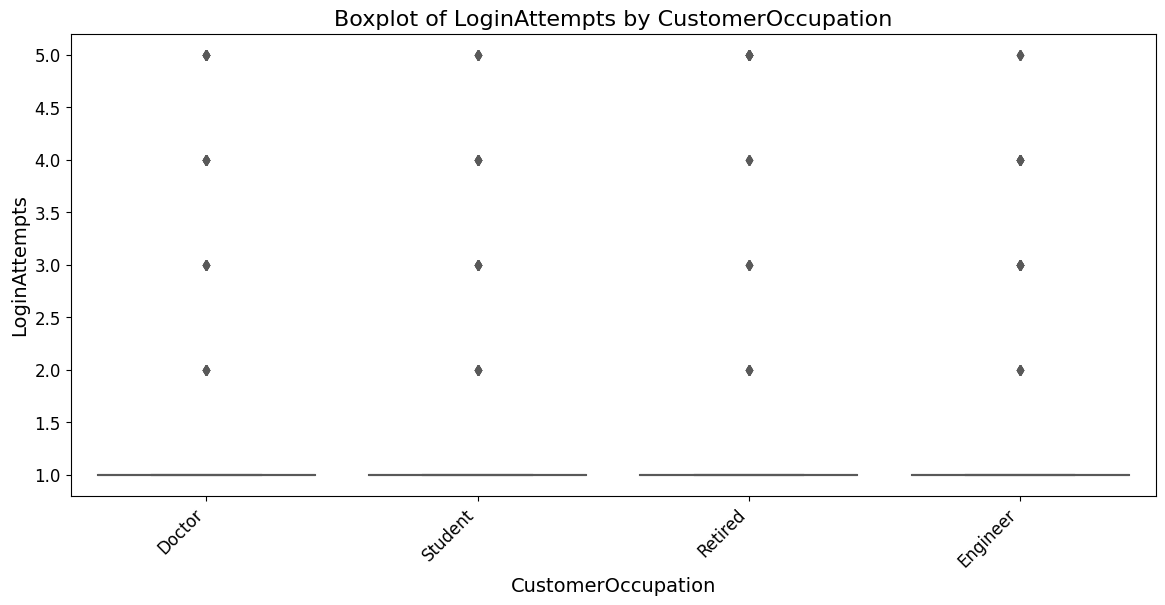

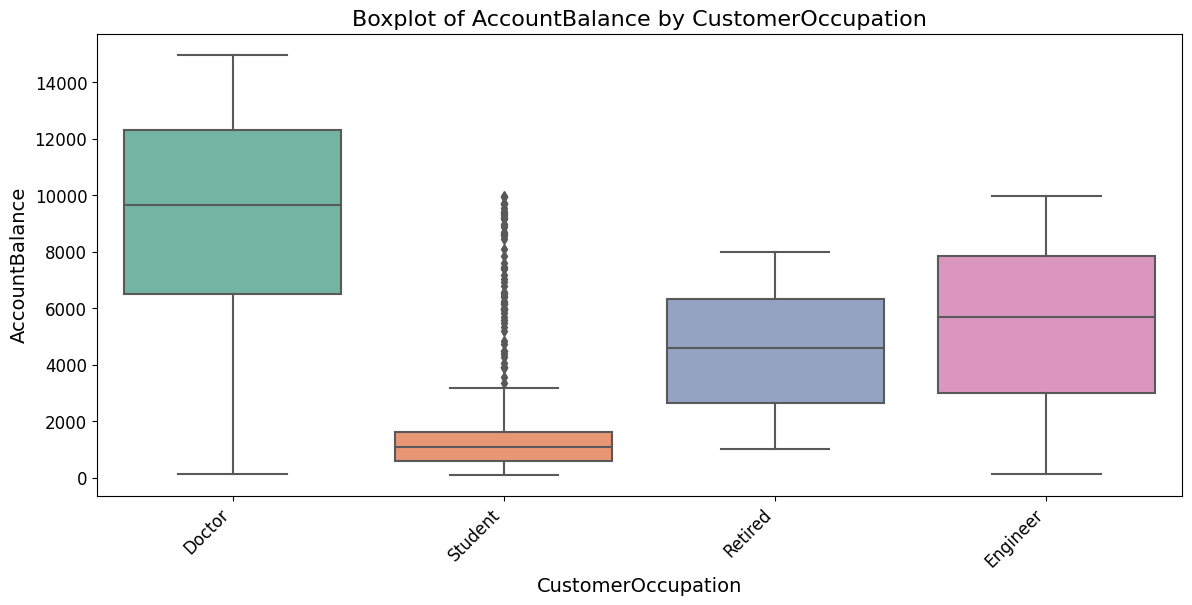

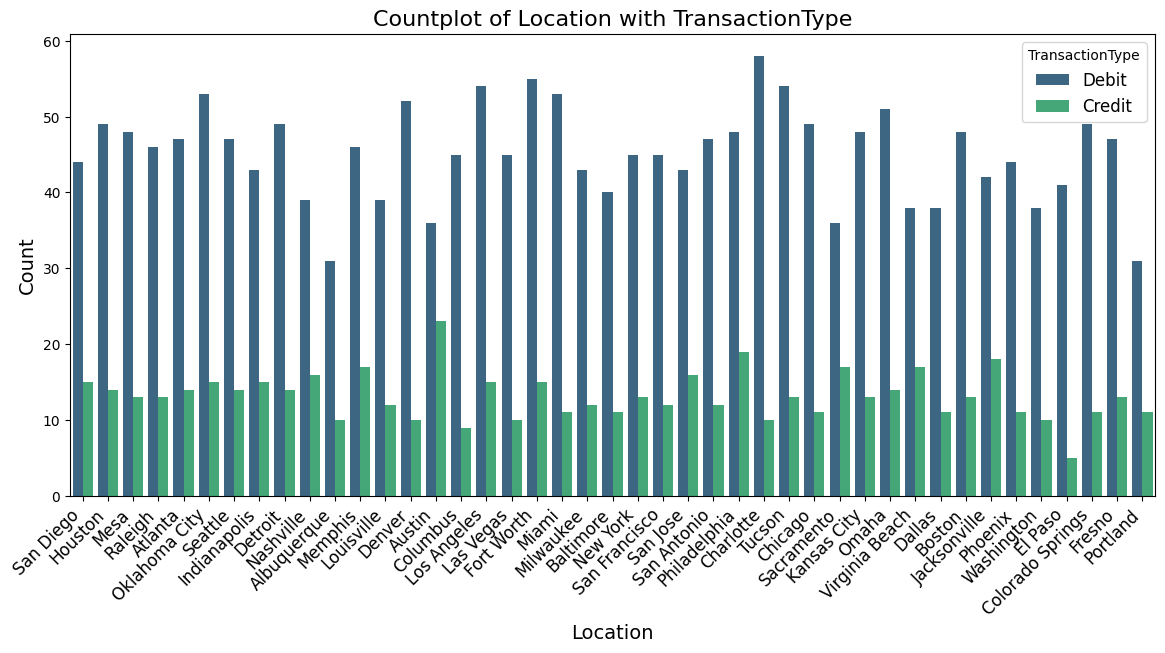

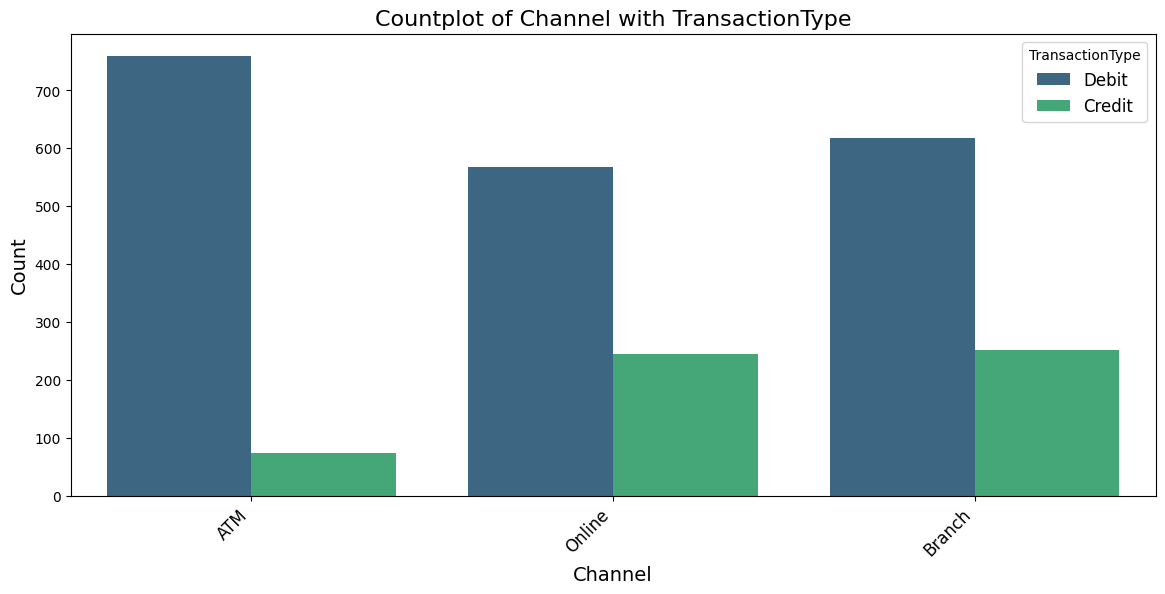

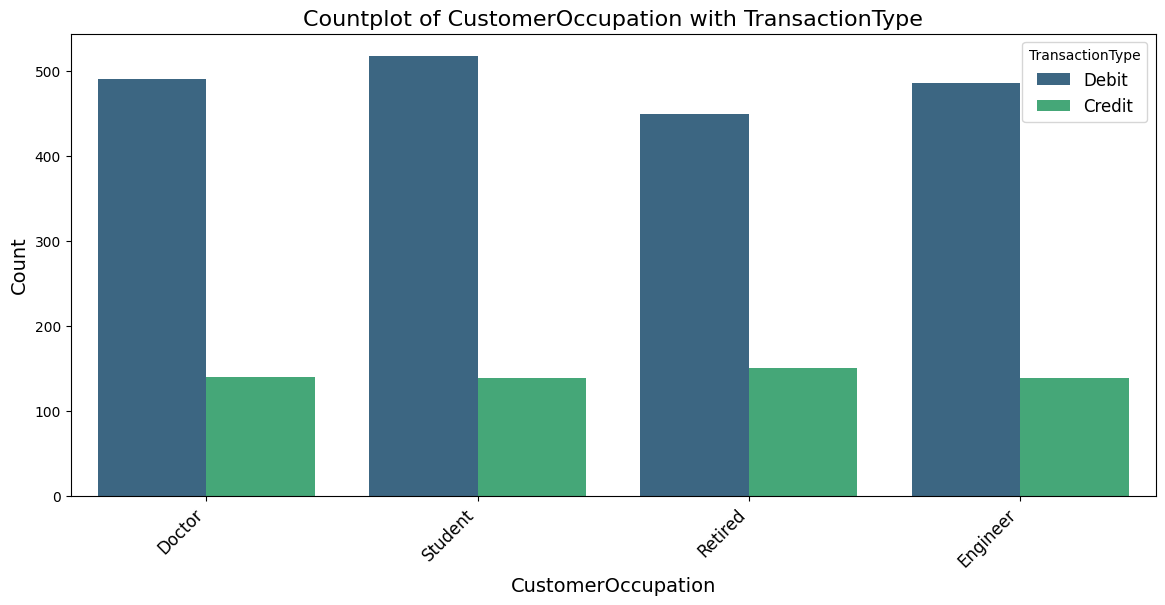

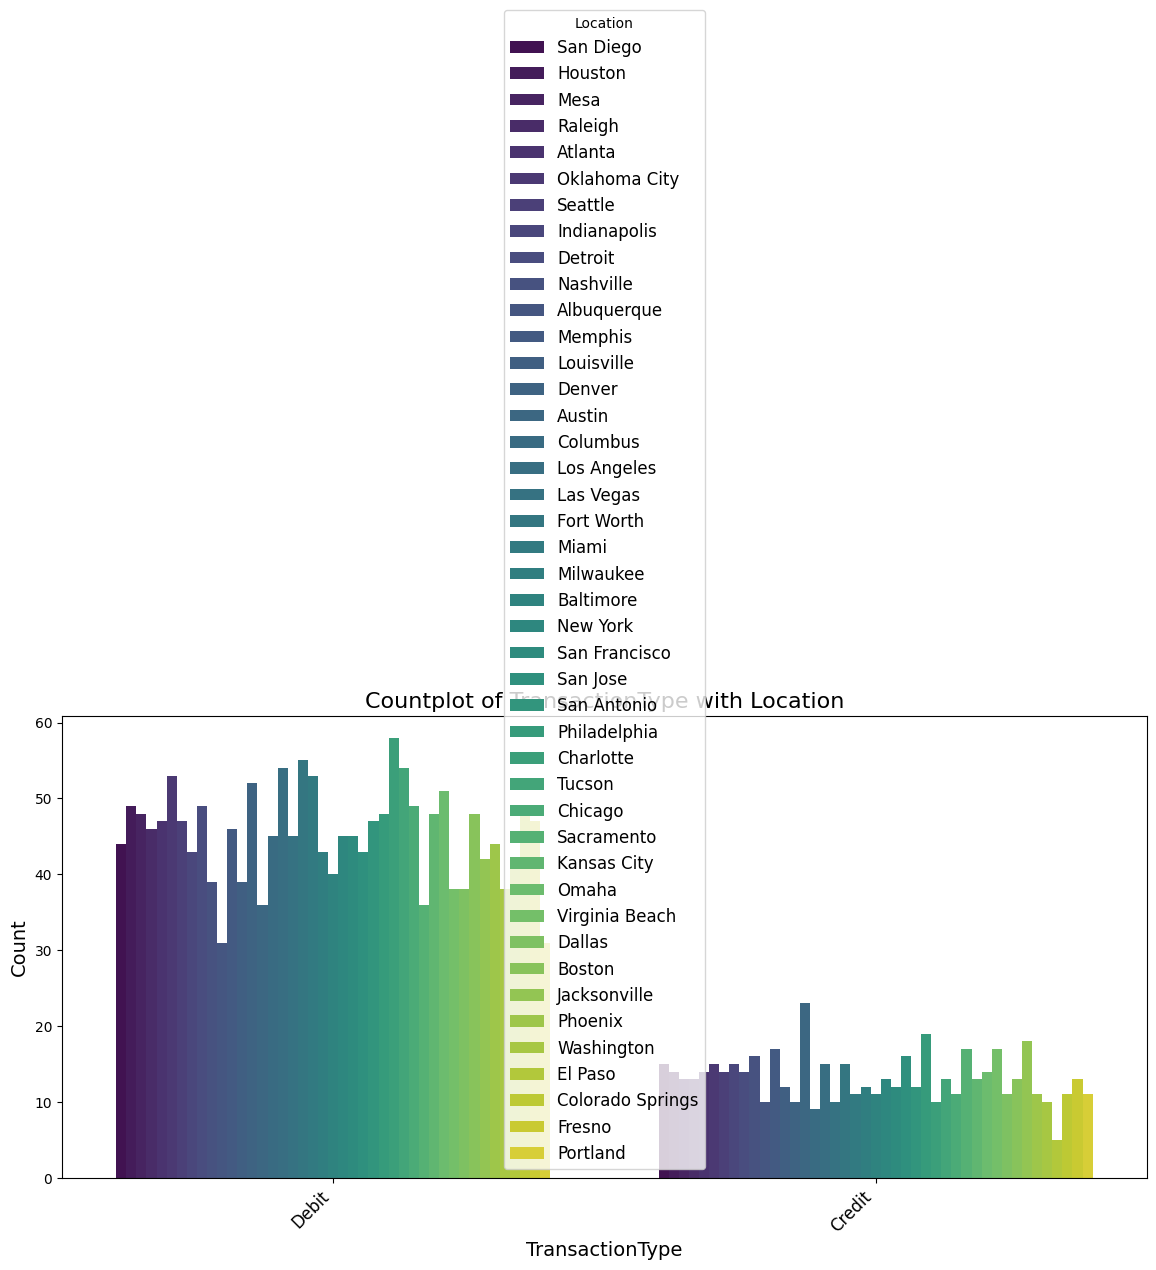

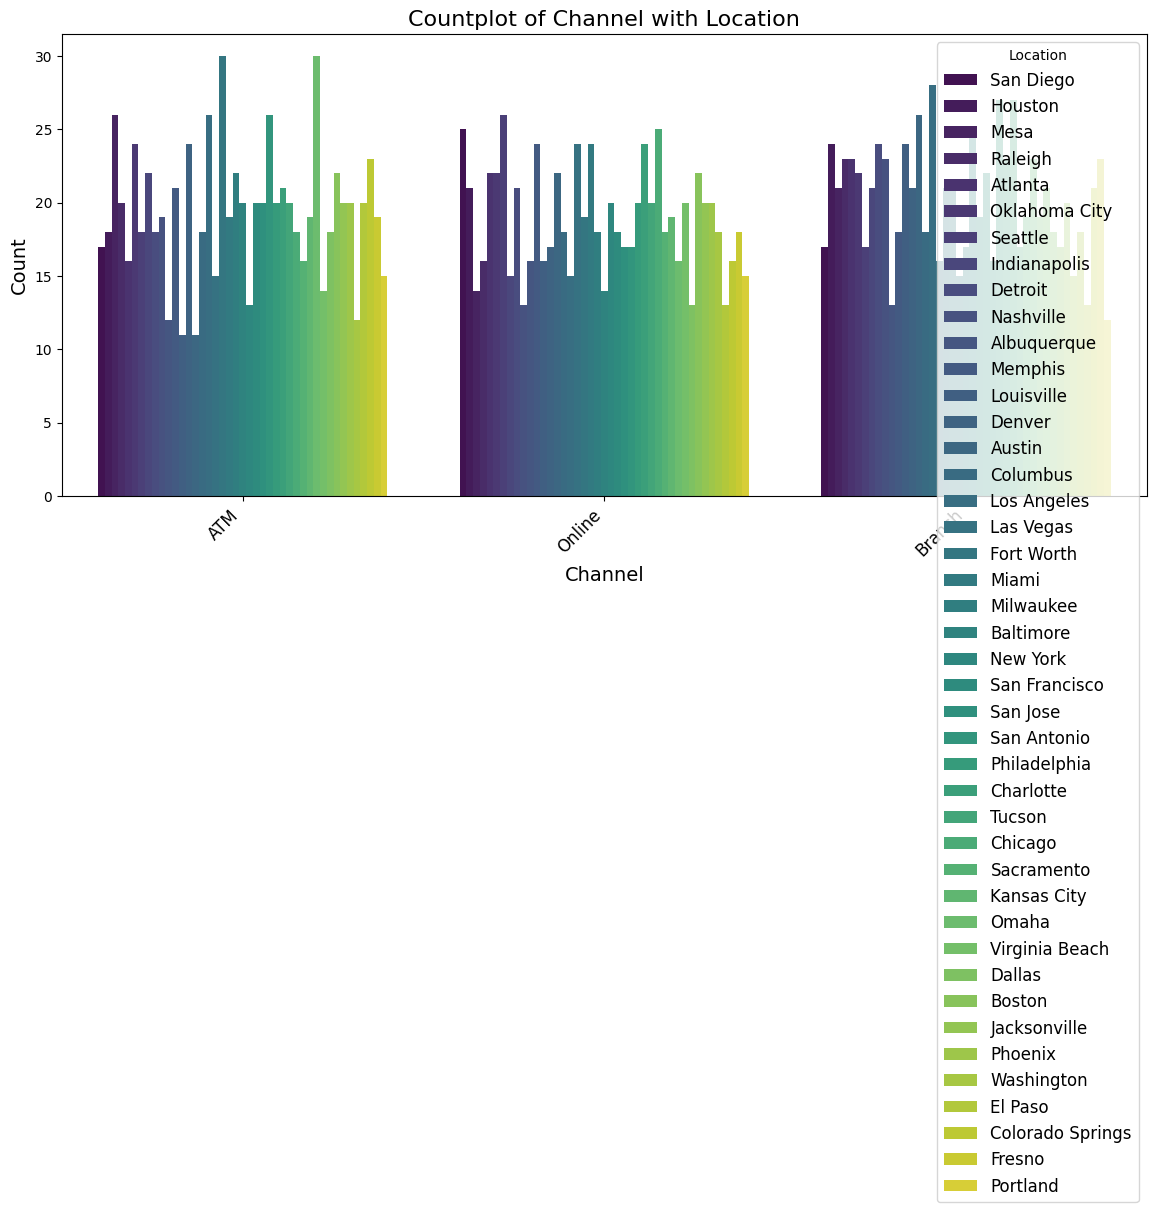

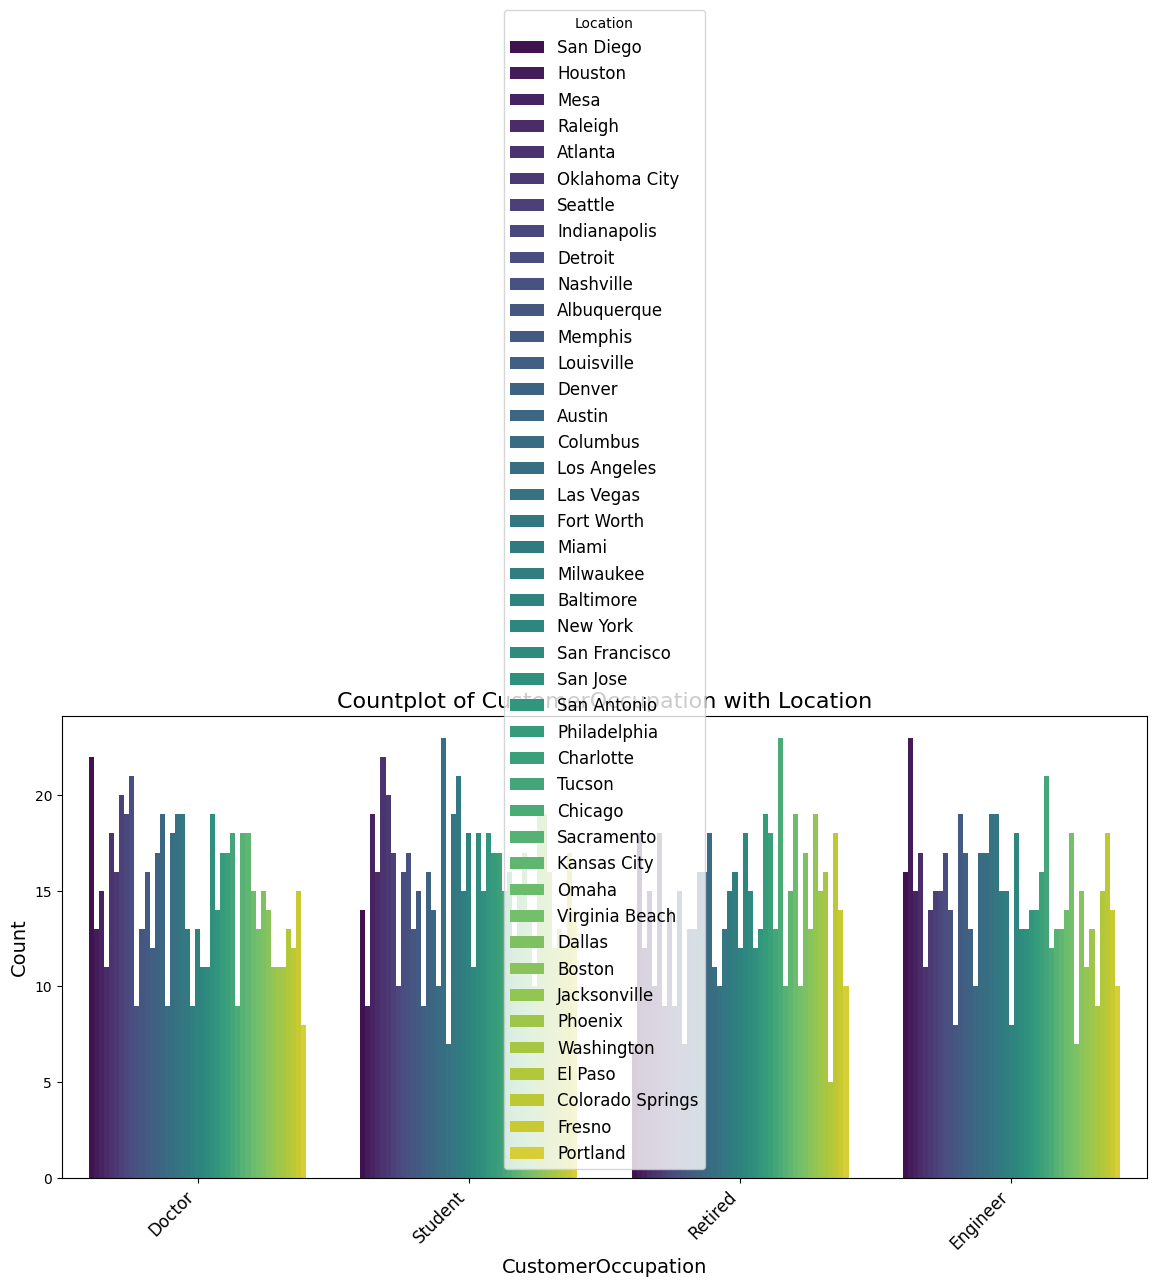

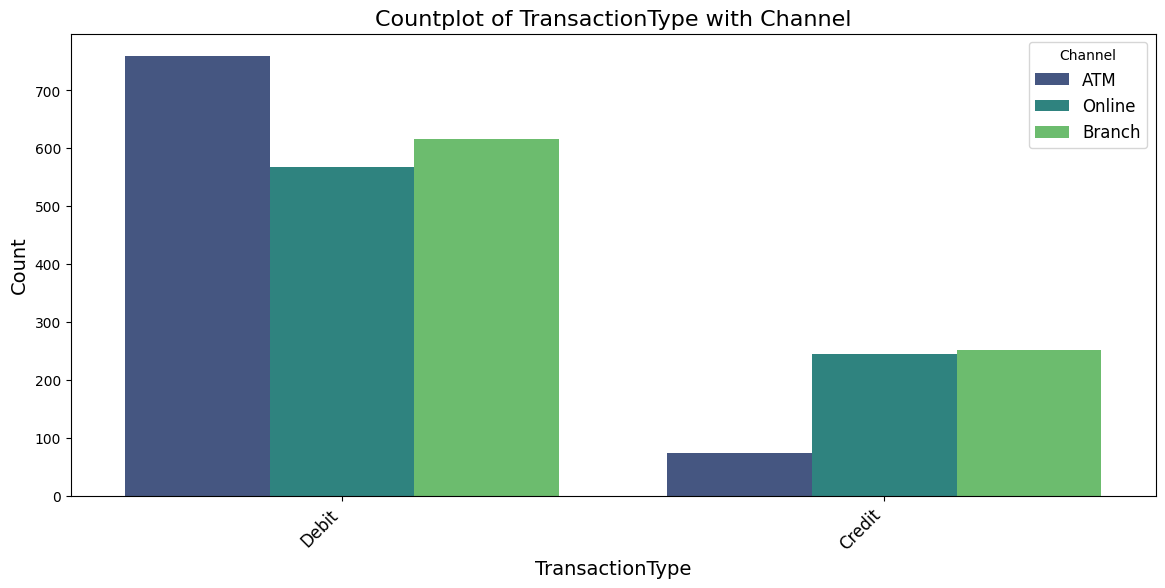

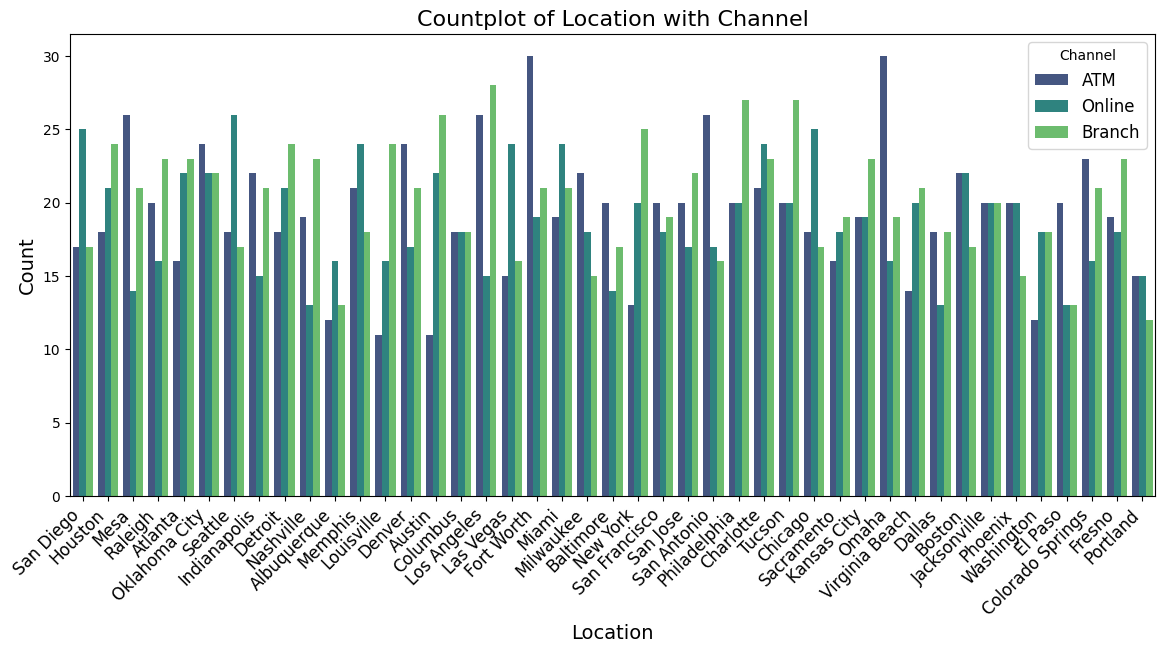

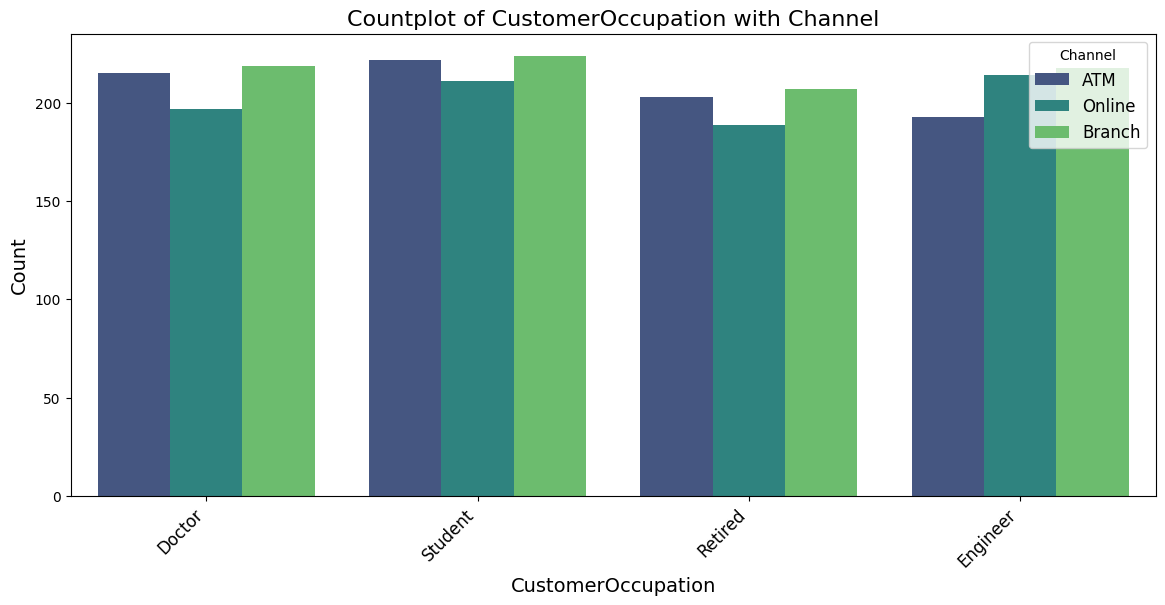

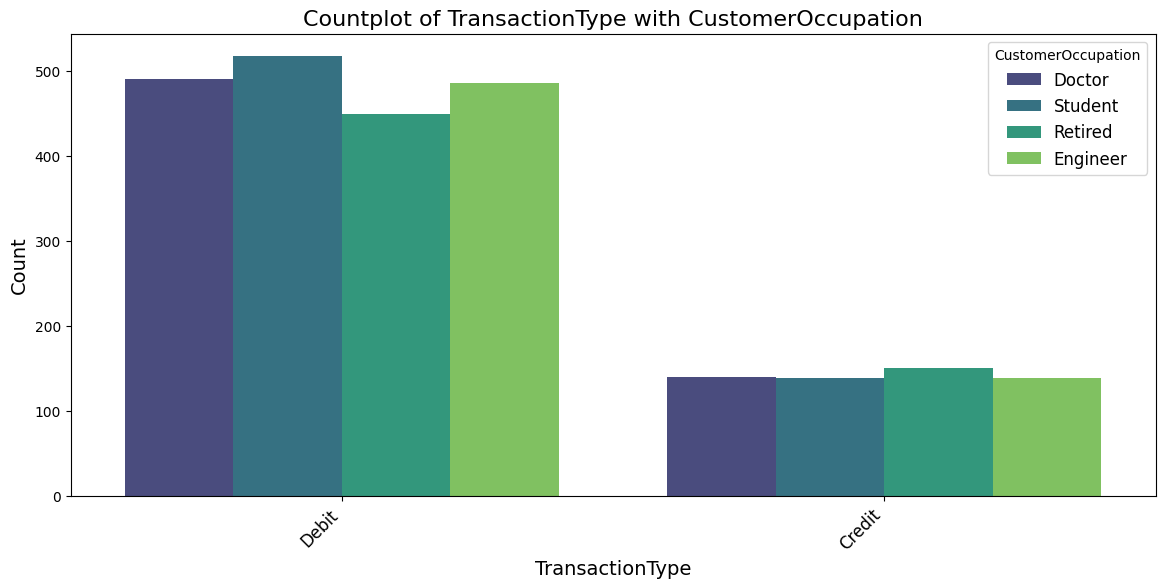

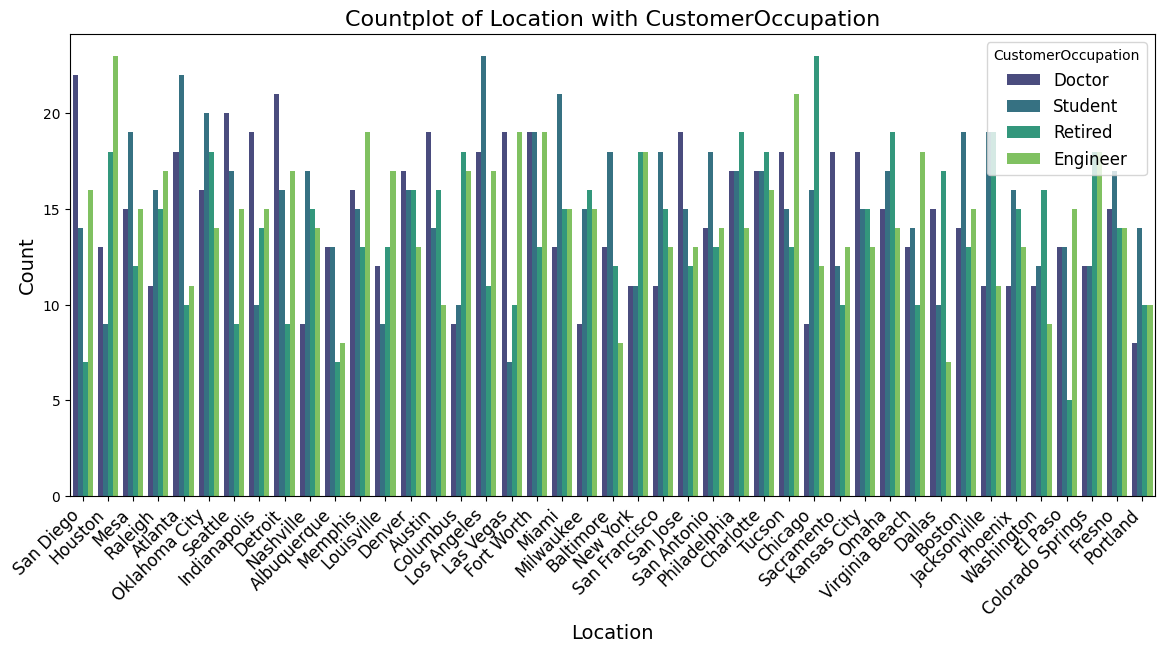

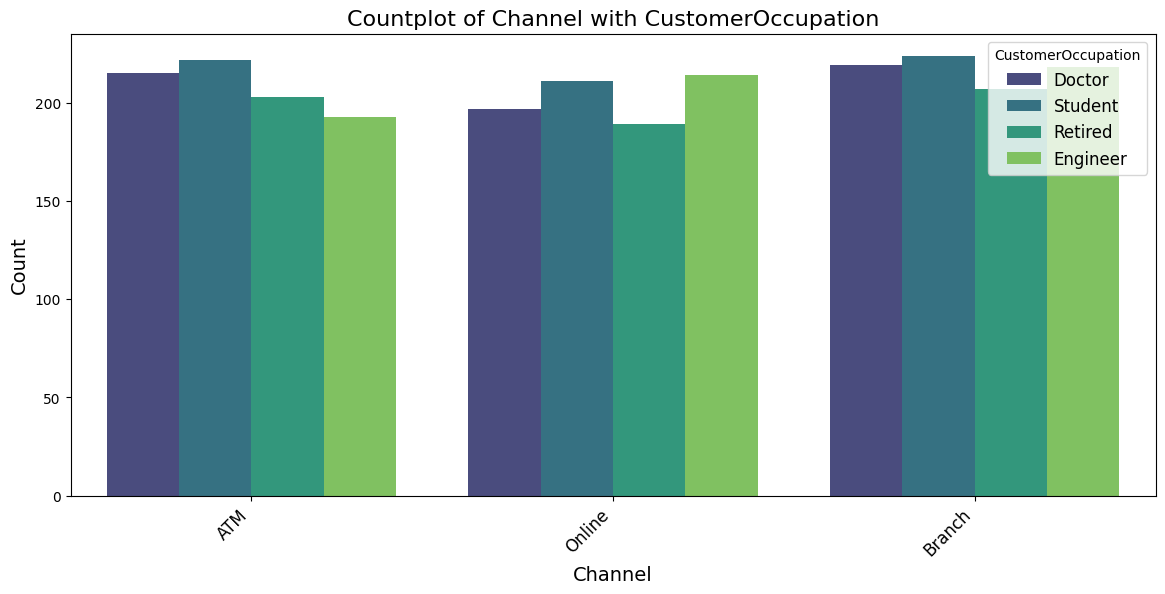

In [4]:
# Define numeric and categorical columns
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# 1. Correlation Heatmap for Numeric Columns
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numeric Columns', fontsize=16)
plt.show()

# 2. Scatterplots for Numeric vs Numeric
for i, col1 in enumerate(numeric_cols):
    for col2 in numeric_cols[i+1:]:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=data[col1], y=data[col2], alpha=0.7)
        plt.title(f'Scatterplot: {col1} vs {col2}', fontsize=16)
        plt.xlabel(col1, fontsize=14)
        plt.ylabel(col2, fontsize=14)
        plt.grid(True)
        plt.show()

# 3. Boxplot for Numeric vs Categorical
for cat_col in categorical_cols:
    for num_col in numeric_cols:
        plt.figure(figsize=(14, 6))
        sns.boxplot(x=cat_col, y=num_col, data=data, palette='Set2')
        plt.title(f'Boxplot of {num_col} by {cat_col}', fontsize=16)
        plt.xlabel(cat_col, fontsize=14)
        plt.ylabel(num_col, fontsize=14)
        plt.xticks(rotation=45, fontsize=12, ha='right')
        plt.yticks(fontsize=12)
        plt.show()

# 4. Countplot with Hue for Categorical vs Categorical
for cat1 in categorical_cols:
    for cat2 in categorical_cols:
        if cat1 != cat2:  # Avoid self-comparison
            plt.figure(figsize=(14, 6))
            sns.countplot(x=cat2, hue=cat1, data=data, palette='viridis')
            plt.title(f'Countplot of {cat2} with {cat1}', fontsize=16)
            plt.xlabel(cat2, fontsize=14)
            plt.ylabel('Count', fontsize=14)
            plt.xticks(rotation=45, fontsize=12, ha='right')
            plt.legend(title=cat1, fontsize=12)
            plt.show()


## **3. Multivariate Analysis**
### Explores interactions among three or more variables to uncover complex relationships, often visualized with pairplots or multidimensional clustering methods.

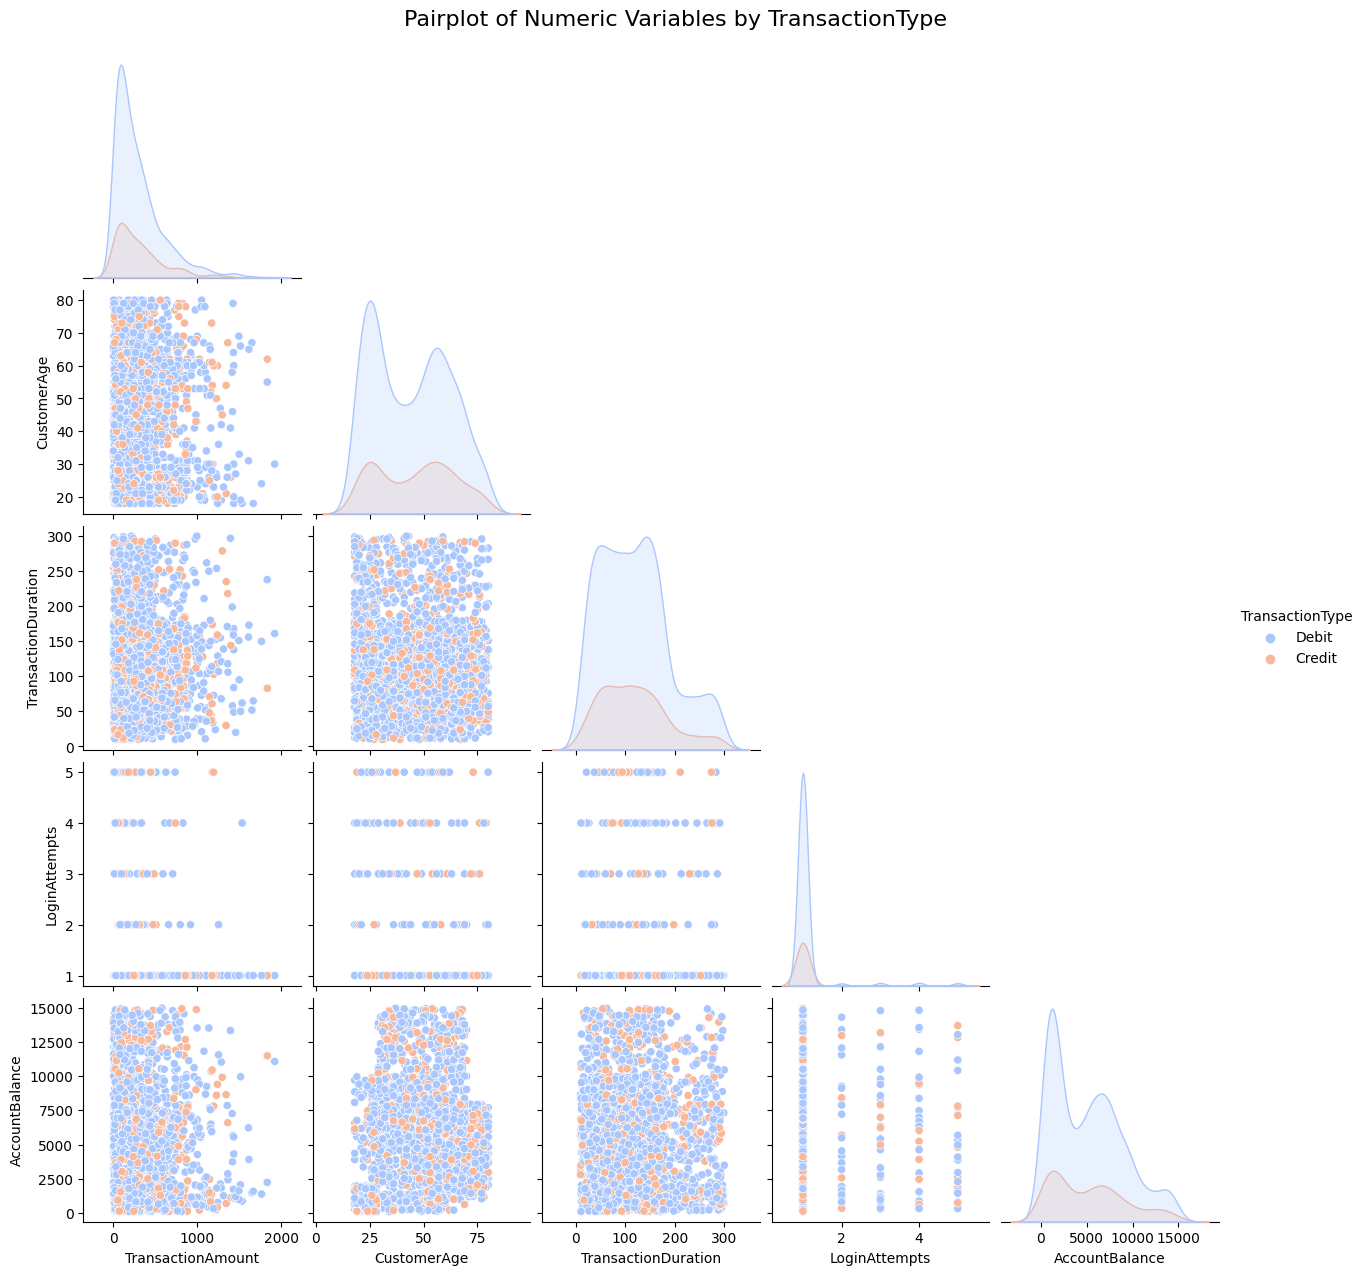

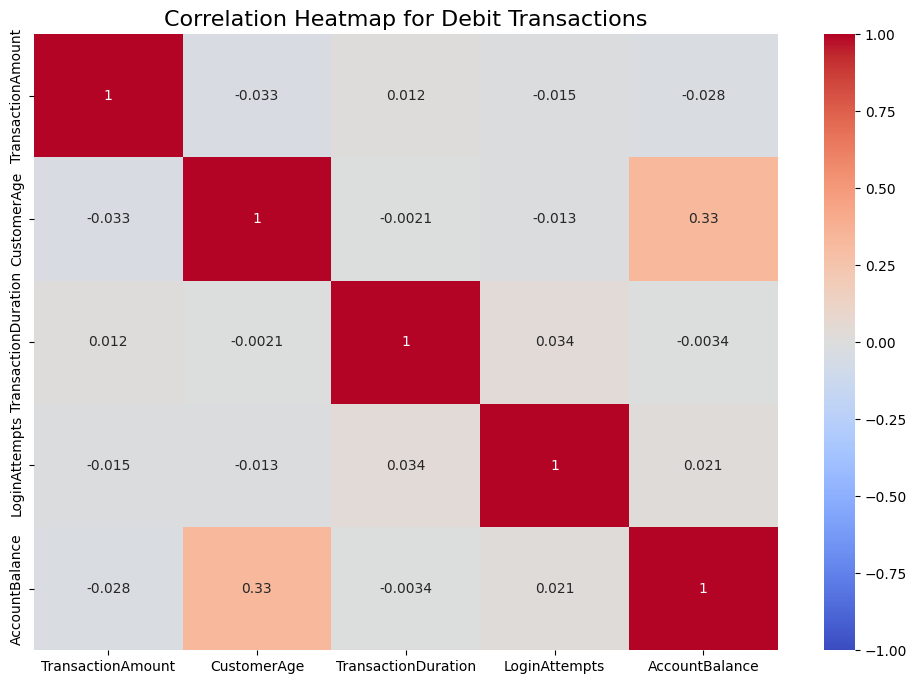

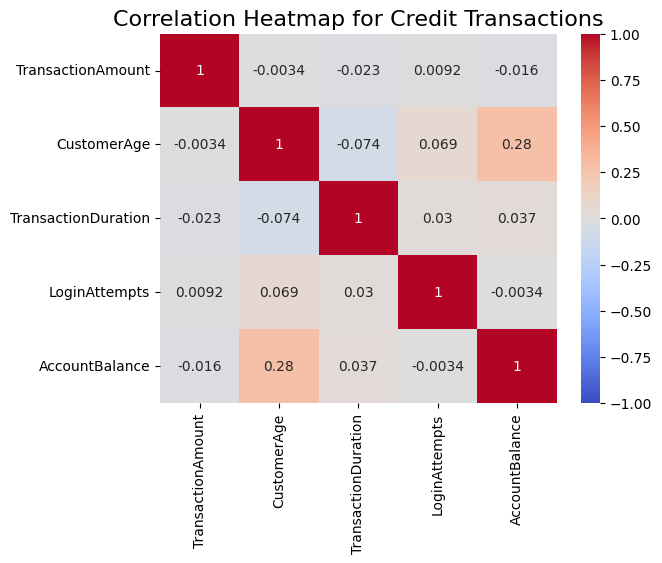

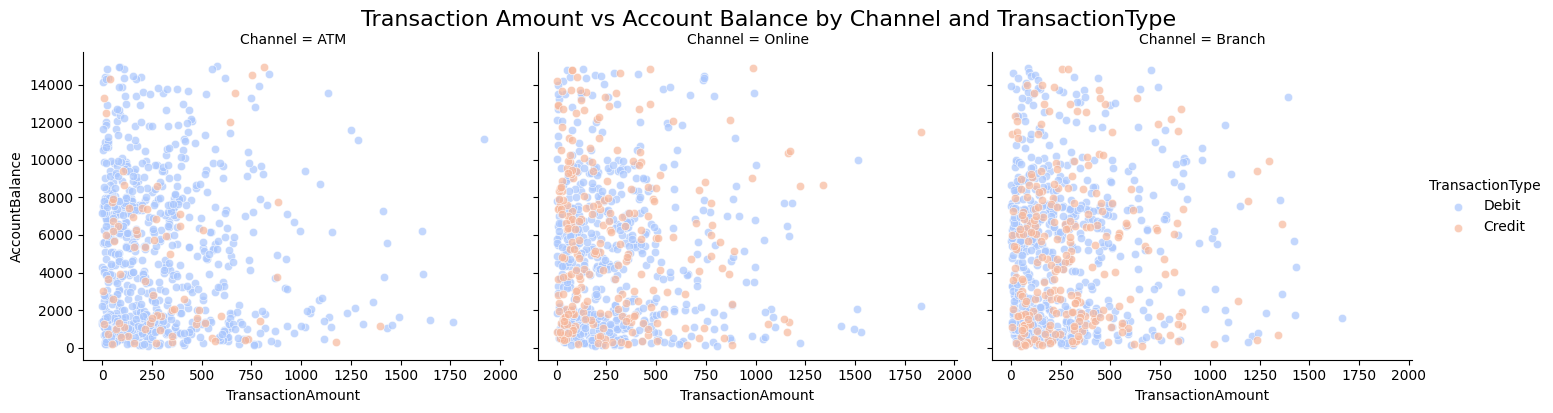

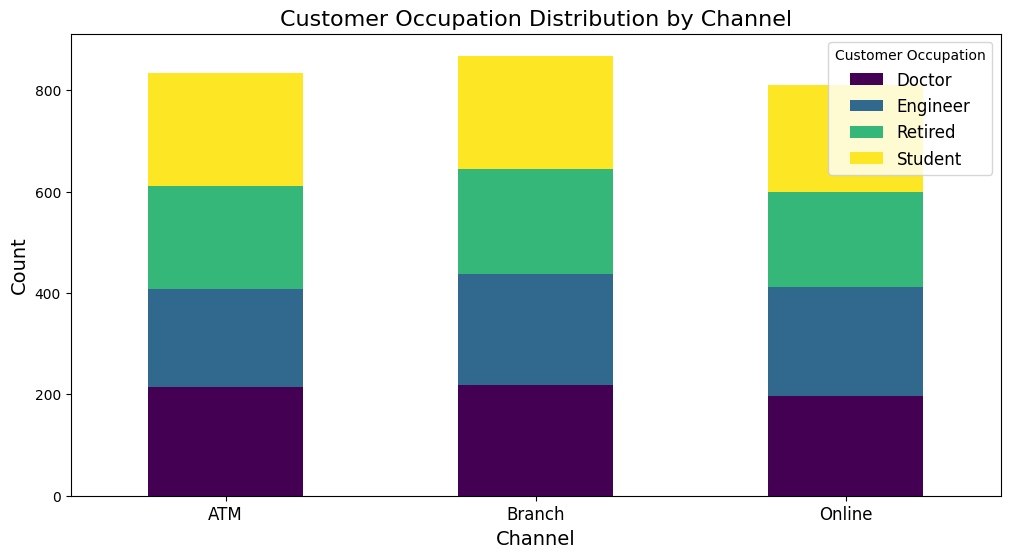

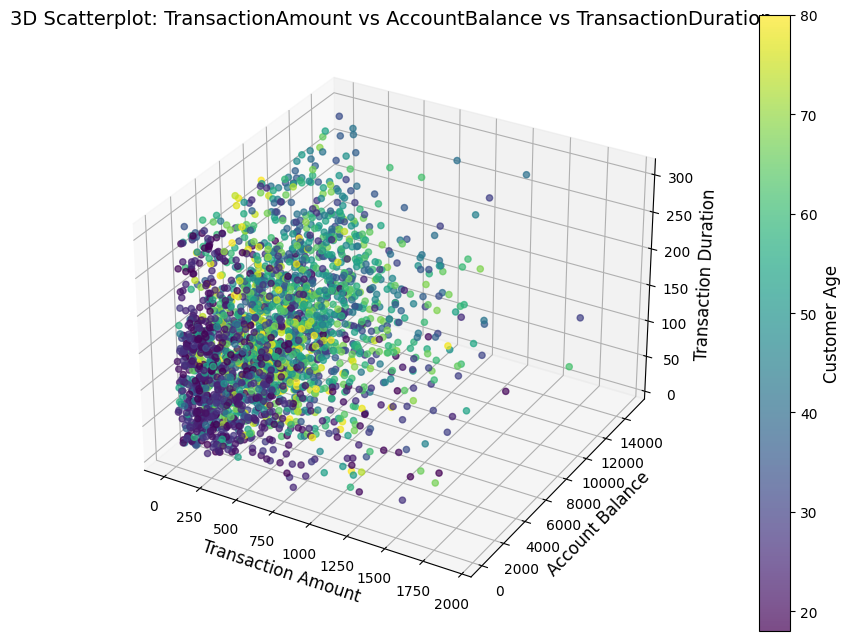

In [5]:
# 1. Multivariate Pairplot (Numeric variables colored by a categorical variable)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.pairplot(data, vars=numeric_cols, hue='TransactionType', palette='coolwarm', corner=True, diag_kind='kde')
plt.suptitle('Pairplot of Numeric Variables by TransactionType', fontsize=16, y=1.02)
plt.show()

# 2. Heatmap of Numeric Correlations grouped by a Categorical Variable
plt.figure(figsize=(12, 8))
for trans_type in data['TransactionType'].unique():
    subset = data[data['TransactionType'] == trans_type]
    plt.title(f'Correlation Heatmap for {trans_type} Transactions', fontsize=16)
    sns.heatmap(subset[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.show()

# 3. FacetGrid: Scatterplot of Transaction Amount vs Account Balance by Channel
g = sns.FacetGrid(data, col="Channel", hue="TransactionType", palette="coolwarm", height=4, aspect=1.2)
g.map(sns.scatterplot, "TransactionAmount", "AccountBalance", alpha=0.7)
g.add_legend()
g.fig.suptitle('Transaction Amount vs Account Balance by Channel and TransactionType', fontsize=16, y=1.02)
plt.show()

# 4. Stacked Bar Chart: Customer Occupation Distribution by Channel
occupation_channel = data.groupby(['Channel', 'CustomerOccupation']).size().unstack()
occupation_channel.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Customer Occupation Distribution by Channel', fontsize=16)
plt.xlabel('Channel', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Customer Occupation', fontsize=12)
plt.show()

# 5. 3D Scatterplot: Visualize three numeric variables

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data['TransactionAmount'], 
    data['AccountBalance'], 
    data['TransactionDuration'], 
    c=data['CustomerAge'], 
    cmap='viridis', 
    alpha=0.7
)
ax.set_xlabel('Transaction Amount', fontsize=12)
ax.set_ylabel('Account Balance', fontsize=12)
ax.set_zlabel('Transaction Duration', fontsize=12)
plt.title('3D Scatterplot: TransactionAmount vs AccountBalance vs TransactionDuration', fontsize=14)
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Customer Age', fontsize=12)
plt.show()

---
# **Fraud Detection Methods**
----

### **SETUP**
Importing necessary libraries, preprocessing columns for uniform formatting, defining columns based on datatype, encoding data to avoid dummy variable trap and producing descriptive statistics of given dataset.

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Preprocessing: Handle datetime columns
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'],format='%Y-%m-%d %H:%M:%S')
data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'],format='%Y-%m-%d %H:%M:%S')
data['TimeSinceLastTransaction'] = (data['TransactionDate'] - data['PreviousTransactionDate']).dt.total_seconds()

# Identify numeric and categorical columns
numeric_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge', 'TimeSinceLastTransaction']
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Normalize numeric columns
scaler = StandardScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Avoid dummy variable trap
categorical_encoded = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), 
                                   columns=encoder.get_feature_names_out(categorical_cols))

# Combine preprocessed data
processed_data = pd.concat([numeric_scaled, categorical_encoded], axis=1)

# Descriptive Statistics
print("Descriptive Statistics:")
print(data[numeric_cols].describe())

# Initialize Fraud column
data['Fraud'] = False

Descriptive Statistics:
       TransactionAmount  TransactionDuration  LoginAttempts  AccountBalance  \
count        2512.000000          2512.000000    2512.000000     2512.000000   
mean          297.593778           119.643312       1.124602     5114.302966   
std           291.946243            69.963757       0.602662     3900.942499   
min             0.260000            10.000000       1.000000      101.250000   
25%            81.885000            63.000000       1.000000     1504.370000   
50%           211.140000           112.500000       1.000000     4735.510000   
75%           414.527500           161.000000       1.000000     7678.820000   
max          1919.110000           300.000000       5.000000    14977.990000   

       CustomerAge  TimeSinceLastTransaction  
count  2512.000000              2.512000e+03  
mean     44.673965             -4.211863e+07  
std      17.792198              9.191205e+06  
min      18.000000             -5.803267e+07  
25%      27.000000  

## **1. K-Means Clustering**
### Identifies anomalies based on distance from centroids.

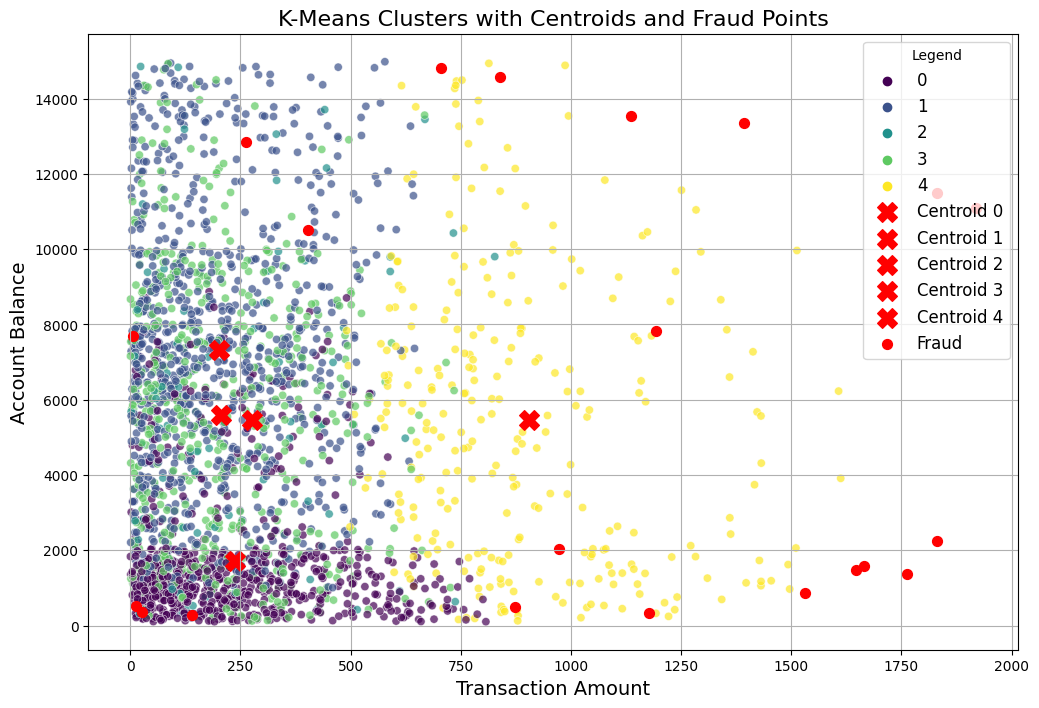

Total Fraudulent Transactions Detected (Using K Means clustering): 21
Fraudulent transactions saved to: /kaggle/working/kmeans_fraud_transactions.csv
Fraudulent Transactions Detected:
     TransactionID AccountID  TransactionAmount     TransactionDate  \
146       TX000147   AC00385             973.39 2023-08-30 17:23:20   
231       TX000232   AC00430             705.60 2023-02-20 18:41:43   
274       TX000275   AC00454            1176.28 2023-12-20 16:08:02   
340       TX000341   AC00107            1830.00 2023-03-01 16:31:58   
375       TX000376   AC00316            1392.54 2023-11-20 16:51:14   
394       TX000395   AC00326               6.30 2023-12-14 18:52:54   
593       TX000594   AC00039             139.57 2023-11-17 17:59:11   
653       TX000654   AC00423            1919.11 2023-06-27 17:48:25   
898       TX000899   AC00083            1531.31 2023-10-23 18:00:29   
1055      TX001056   AC00317              13.48 2023-09-20 17:49:53   
1167      TX001168   AC00010       

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Identify numeric columns
numeric_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']

# Standardize numeric columns for clustering
scaler = StandardScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)

# Perform K-Means clustering
kmeans = KMeans(n_init='auto')  # FutureProofing
kmeans.fit(numeric_scaled)
n_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(numeric_scaled)
data['KMeans_Cluster'] = kmeans_labels

# Calculate distances from centroids
centroids = kmeans.cluster_centers_
distances = np.linalg.norm(numeric_scaled.values - centroids[kmeans_labels], axis=1)
data['KMeans_Distance'] = distances

# Set threshold: Mean + 3 * Standard Deviation
threshold = distances.mean() + 3 * distances.std()
data['KMeans_Fraud'] = distances > threshold

# Summary of flagged anomalies
fraud_summary = data['KMeans_Fraud'].value_counts()
threshold, fraud_summary, data[['TransactionAmount', 'KMeans_Distance', 'KMeans_Fraud']].head()


# Calculate centroids and scale them back to the original feature space
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

# Add a fraud detection logic (using distance from centroids)
distances = np.linalg.norm(numeric_scaled - centroids_scaled[kmeans_labels], axis=1)
threshold = distances.mean() + 3 * distances.std()
data['Fraud'] = distances > threshold
data['KMeans_Distance'] = distances

# Scatterplot for two features with clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['TransactionAmount'],
    y=data['AccountBalance'],
    hue=data['KMeans_Cluster'],
    palette='viridis',
    alpha=0.7,
    legend='full'
)

# Overlay centroids on the scatterplot
for i, centroid in enumerate(centroids_original):
    plt.scatter(
        centroid[numeric_cols.index('TransactionAmount')],
        centroid[numeric_cols.index('AccountBalance')],
        color='red',
        marker='X',
        s=200,
        label=f'Centroid {i}'
    )

# Highlight fraud points
fraud_points = data[data['Fraud']]
plt.scatter(
    fraud_points['TransactionAmount'],
    fraud_points['AccountBalance'],
    color='red',
    marker='o',
    s=50,
    label='Fraud'
)

plt.title('K-Means Clusters with Centroids and Fraud Points', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Legend', fontsize=12)
plt.grid(True)
plt.show()

# Save fraud transactions to a separate CSV file
fraud_output_path = '/kaggle/working/kmeans_fraud_transactions.csv'
fraud_points.to_csv(fraud_output_path, index=False)

# Print summary of fraud points
total_fraud_points = data['Fraud'].sum()
print(f"Total Fraudulent Transactions Detected (Using K Means clustering): {total_fraud_points}")
print(f"Fraudulent transactions saved to: {fraud_output_path}")

# Display fraud transactions
print("Fraudulent Transactions Detected:")
print(fraud_points)

## **2. Z-Score Analysis**
### Flags extreme outliers in numeric features.

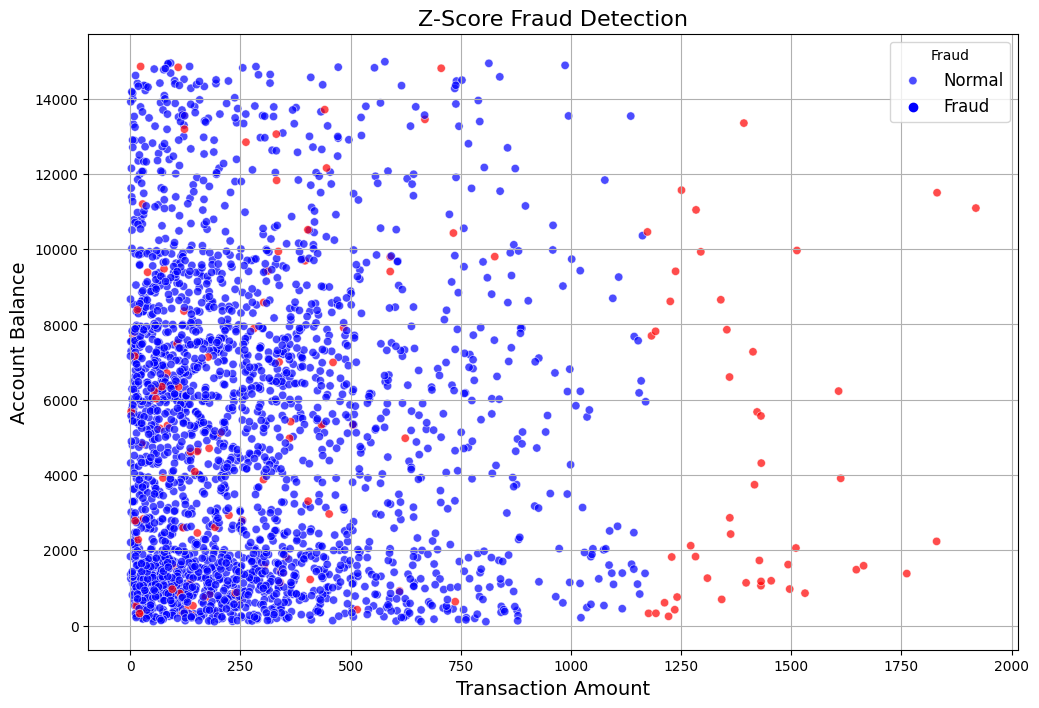

Total Fraudulent Transactions Detected by Z-Score Analysis: 140
Fraudulent transactions saved to: /kaggle/working/zscore_fraud_transactions.csv
     TransactionID AccountID  TransactionAmount     TransactionDate  \
23        TX000024   AC00453             345.84 2023-05-02 18:25:46   
26        TX000027   AC00441             246.93 2023-04-17 16:37:01   
32        TX000033   AC00060             396.45 2023-09-25 16:26:00   
74        TX000075   AC00265            1212.51 2023-10-04 16:36:29   
85        TX000086   AC00098            1340.19 2023-09-29 17:22:10   
...            ...       ...                ...                 ...   
2380      TX002381   AC00098            1173.74 2023-09-25 16:44:52   
2403      TX002404   AC00111            1493.00 2023-06-07 17:05:41   
2414      TX002415   AC00028            1664.33 2023-09-25 17:11:19   
2423      TX002424   AC00340             332.06 2023-06-21 16:38:54   
2445      TX002446   AC00439             403.01 2023-09-04 17:32:35   

   

In [8]:
from scipy.stats import zscore


# Define numeric columns
numeric_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']

# Calculate Z-Scores
z_scores = np.abs(zscore(data[numeric_cols]))
data['ZScore_Fraud'] = (z_scores > 3).any(axis=1)  # Flag transactions where any feature exceeds |z| > 3

# Extract fraudulent transactions
zscore_fraud_points = data[data['ZScore_Fraud']]

# Summary of results
total_zscore_fraud_points = data['ZScore_Fraud'].sum()
zscore_fraud_points_summary = zscore_fraud_points[numeric_cols + ['ZScore_Fraud']]

# Adding True values to Fraud column
data['Fraud'] |= data['ZScore_Fraud']

# Scatterplot for Z-Score fraud detection
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['TransactionAmount'],
    y=data['AccountBalance'],
    hue=data['ZScore_Fraud'],
    palette={True: 'red', False: 'blue'},
    alpha=0.7
)
plt.title('Z-Score Fraud Detection', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Fraud', labels=['Normal', 'Fraud'], fontsize=12)
plt.grid(True)
plt.show()

# Save fraudulent transactions detected by Z-Score analysis
zscore_fraud_output_path = '/kaggle/working/zscore_fraud_transactions.csv'
zscore_fraud_points.to_csv(zscore_fraud_output_path, index=False)

# Summary
print(f"Total Fraudulent Transactions Detected by Z-Score Analysis: {total_zscore_fraud_points}")
print(f"Fraudulent transactions saved to: {zscore_fraud_output_path}")
print(zscore_fraud_points)

## **3. Isolation Forest**
### Highlights anomalous transactions using tree-based partitioning.

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


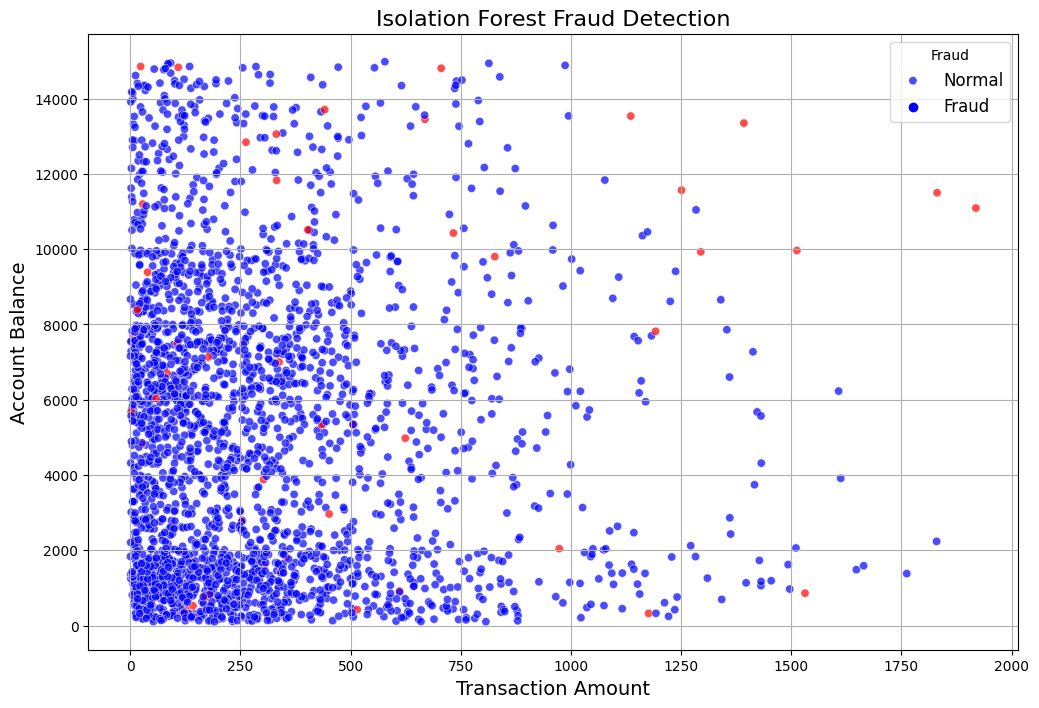

Total Fraudulent Transactions Detected (using isolation forest): 51
Fraudulent transactions saved to: /kaggle/working/iso_forest_fraud_transactions.csv


In [9]:
from sklearn.ensemble import IsolationForest
warnings.filterwarnings("ignore", category=FutureWarning)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)  # 2% expected anomalies
iso_forest.fit(numeric_scaled)  # Fit on the scaled numeric data

# Predict anomalies
data['IsoForest_Score'] = iso_forest.decision_function(numeric_scaled)
data['IsoForest_Fraud'] = iso_forest.predict(numeric_scaled) == -1  # Mark anomalies (-1) as fraud

# Extract fraudulent transactions
iso_fraud_points = data[data['IsoForest_Fraud']]

# Summary of Isolation Forest results
total_iso_fraud_points = data['IsoForest_Fraud'].sum()
iso_fraud_points_summary = iso_fraud_points[['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'IsoForest_Fraud']]

# Adding True values to Fraud column
data['Fraud'] |= data['IsoForest_Fraud']

# Scatterplot to visualize fraud points
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['TransactionAmount'],
    y=data['AccountBalance'],
    hue=data['IsoForest_Fraud'],
    palette={True: 'red', False: 'blue'},
    alpha=0.7
)
plt.title('Isolation Forest Fraud Detection', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Fraud', labels=['Normal', 'Fraud'], fontsize=12)
plt.grid(True)
plt.show()

# Outputs
total_iso_fraud_points, iso_fraud_points_summary.head(), iso_fraud_points_summary.shape

# Save fraudulent transactions detected by Isolation Forest
fraud_output_path = '/kaggle/working/iso_forest_fraud_transactions.csv'
iso_fraud_points.to_csv(fraud_output_path, index=False)

# Confirm the save location and number of frauds
print(f"Total Fraudulent Transactions Detected (using isolation forest): {total_iso_fraud_points}")
print(f"Fraudulent transactions saved to: {fraud_output_path}")

## **4. Logistic Regression**
### Classifies transactions as fraud or non-fraud using supervised learning.


Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       714
        True       1.00      0.93      0.96        40

    accuracy                           1.00       754
   macro avg       1.00      0.96      0.98       754
weighted avg       1.00      1.00      1.00       754



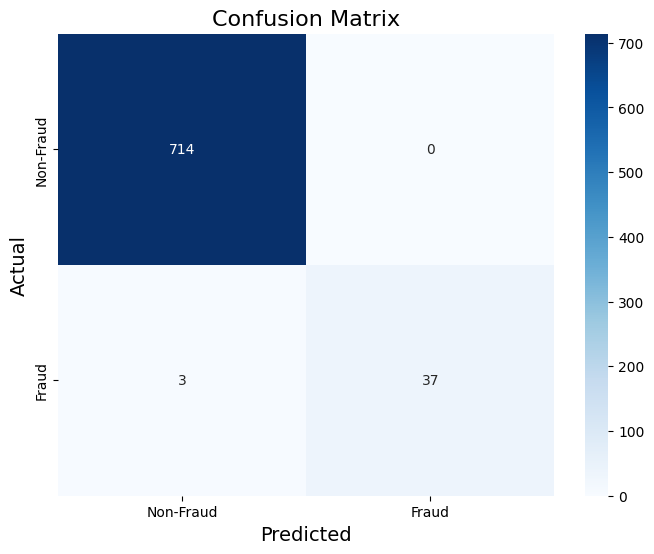

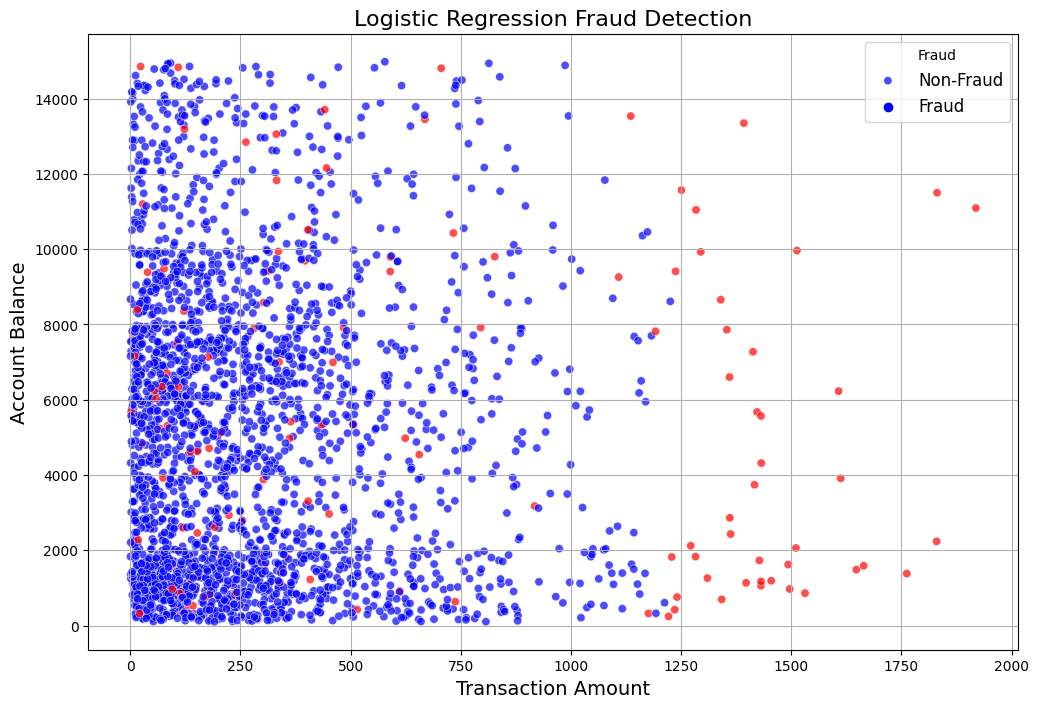

Total Fraudulent Transactions Detected by Logistic Regression: 136
Fraudulent transactions saved to: /kaggle/working/log_reg_fraud_transactions.csv
     TransactionID AccountID  TransactionAmount     TransactionDate  \
23        TX000024   AC00453             345.84 2023-05-02 18:25:46   
26        TX000027   AC00441             246.93 2023-04-17 16:37:01   
32        TX000033   AC00060             396.45 2023-09-25 16:26:00   
38        TX000039   AC00478             795.31 2023-10-12 17:07:40   
85        TX000086   AC00098            1340.19 2023-09-29 17:22:10   
...            ...       ...                ...                 ...   
2403      TX002404   AC00111            1493.00 2023-06-07 17:05:41   
2414      TX002415   AC00028            1664.33 2023-09-25 17:11:19   
2423      TX002424   AC00340             332.06 2023-06-21 16:38:54   
2445      TX002446   AC00439             403.01 2023-09-04 17:32:35   
2455      TX002456   AC00043             655.81 2023-05-05 16:52:44   


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Define relevant columns for logistic regression
features = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance','CustomerAge','TimeSinceLastTransaction']
target = 'Fraud'

# Prepare the dataset
X = data[features]
y = data[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict fraud on the test set
y_pred = log_reg.predict(X_test)


# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

# Add predictions to the dataset
data['LogReg_Fraud'] = log_reg.predict(X_scaled)
data['Fraud'] |= data['LogReg_Fraud']

# Visualize fraud vs. non-fraud transactions
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['TransactionAmount'],
    y=data['AccountBalance'],
    hue=data['LogReg_Fraud'],
    palette={1: 'red', 0: 'blue'},
    alpha=0.7
)
plt.title('Logistic Regression Fraud Detection', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'], fontsize=12)
plt.grid(True)
plt.show()

# Save fraudulent transactions detected by Logistic Regression
log_reg_fraud_output_path = '/kaggle/working/log_reg_fraud_transactions.csv'
log_reg_fraud_points = data[data['LogReg_Fraud'] == 1]
log_reg_fraud_points.to_csv(log_reg_fraud_output_path, index=False)

# Summary
total_log_reg_fraud_points = log_reg_fraud_points.shape[0]
print(f"Total Fraudulent Transactions Detected by Logistic Regression: {total_log_reg_fraud_points}")
print(f"Fraudulent transactions saved to: {log_reg_fraud_output_path}")
print(log_reg_fraud_points)


## **5. DBSCAN Analysis**
### Detects density-based anomalies as noise points.

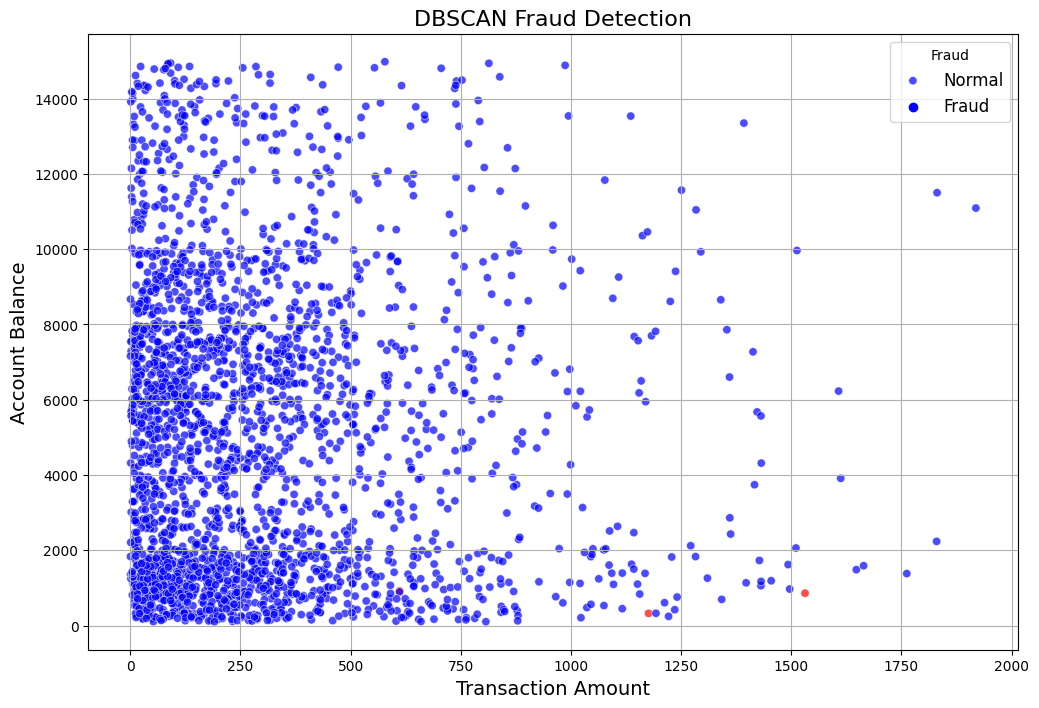

Total Fraudulent Transactions Detected by DBSCAN: 3
Fraudulent transactions saved to: /kaggle/working/dbscan_fraud_transactions.csv
    TransactionID AccountID  TransactionAmount     TransactionDate  \
274      TX000275   AC00454            1176.28 2023-12-20 16:08:02   
454      TX000455   AC00264             611.11 2023-10-18 18:32:31   
898      TX000899   AC00083            1531.31 2023-10-23 18:00:29   

    TransactionType     Location DeviceID      IP Address MerchantID Channel  \
274          Credit  Kansas City  D000476     50.202.8.53       M074     ATM   
454           Debit      Detroit  D000215  141.201.46.191       M045     ATM   
898           Debit    San Diego  D000319  91.204.200.167       M078  Online   

     ...  Fraud KMeans_Cluster  KMeans_Distance  KMeans_Fraud  ZScore_Fraud  \
274  ...   True              2         3.818890          True          True   
454  ...   True              2         3.029864         False          True   
898  ...   True              

In [11]:
from sklearn.cluster import DBSCAN

# Define features for DBSCAN clustering
features = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X_scaled)
data['DBSCAN_Cluster'] = dbscan_labels

# Flag fraud points (noise points are labeled -1)
data['DBSCAN_Fraud'] = data['DBSCAN_Cluster'] == -1

# Extract fraudulent transactions
dbscan_fraud_points = data[data['DBSCAN_Fraud']]

# Summary of results
total_dbscan_fraud_points = data['DBSCAN_Fraud'].sum()
dbscan_fraud_points_summary = dbscan_fraud_points[['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'DBSCAN_Fraud']]

# Mark noise points in Fraud column
data['Fraud'] |= data['DBSCAN_Fraud']

# Scatterplot for DBSCAN fraud detection
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['TransactionAmount'],
    y=data['AccountBalance'],
    hue=data['DBSCAN_Fraud'],
    palette={True: 'red', False: 'blue'},
    alpha=0.7
)
plt.title('DBSCAN Fraud Detection', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Fraud', labels=['Normal', 'Fraud'], fontsize=12)
plt.grid(True)
plt.show()

# Save fraudulent transactions detected by DBSCAN
dbscan_fraud_output_path = '/kaggle/working/dbscan_fraud_transactions.csv'
dbscan_fraud_points.to_csv(dbscan_fraud_output_path, index=False)

# Summary
print(f"Total Fraudulent Transactions Detected by DBSCAN: {total_dbscan_fraud_points}")
print(f"Fraudulent transactions saved to: {dbscan_fraud_output_path}")
print(dbscan_fraud_points)

---
# Consolidated Fraud Analysis
---
### Using the statistical fraud analysis methods, we deduce all the potential fraud transactions. Now, we assign threat level to each suspicious transaction based on overlapping fraud values obtained from running each fraud analysis statistical test.

Total Fraudulent Transactions Detected: 148


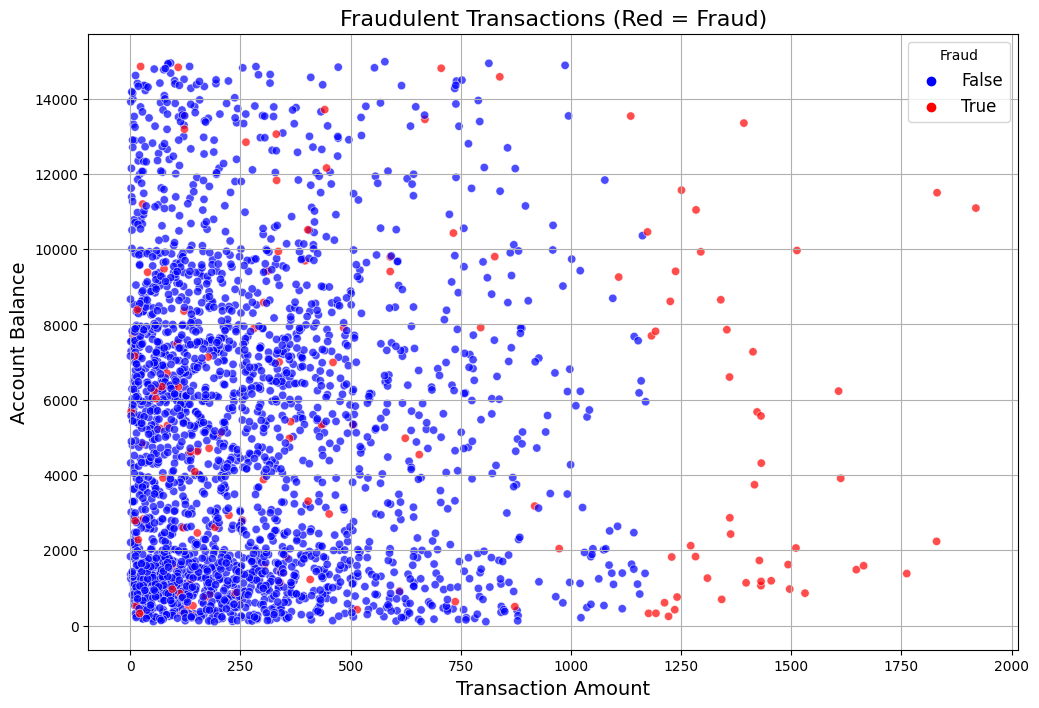

Results saved to /kaggle/working/fraud_detection_results.csv
     TransactionID AccountID  TransactionAmount     TransactionDate  \
23        TX000024   AC00453             345.84 2023-05-02 18:25:46   
26        TX000027   AC00441             246.93 2023-04-17 16:37:01   
32        TX000033   AC00060             396.45 2023-09-25 16:26:00   
38        TX000039   AC00478             795.31 2023-10-12 17:07:40   
74        TX000075   AC00265            1212.51 2023-10-04 16:36:29   
...            ...       ...                ...                 ...   
2403      TX002404   AC00111            1493.00 2023-06-07 17:05:41   
2414      TX002415   AC00028            1664.33 2023-09-25 17:11:19   
2423      TX002424   AC00340             332.06 2023-06-21 16:38:54   
2445      TX002446   AC00439             403.01 2023-09-04 17:32:35   
2455      TX002456   AC00043             655.81 2023-05-05 16:52:44   

     TransactionType          Location DeviceID       IP Address MerchantID  \
23     

In [12]:
# Summary of fraud detection results
print(f"Total Fraudulent Transactions Detected: {data['Fraud'].sum()}")

# Visualize fraudulent transactions
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='TransactionAmount', 
    y='AccountBalance', 
    hue='Fraud', 
    data=data, 
    palette={True: 'red', False: 'blue'}, 
    alpha=0.7
)
plt.title('Fraudulent Transactions (Red = Fraud)', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Fraud', fontsize=12)
plt.grid(True)
plt.show()

# Save the results to a CSV file
output_path = '/kaggle/working/fraud_detection_results.csv'
data.to_csv(output_path, index=False)
print(f"Results saved to {output_path}")

# Filter the DataFrame for rows where 'Fraud' is True
fraud_rows = data[data['Fraud'] == True]

# Print the filtered rows
print(fraud_rows)

In [13]:
# Identify boolean columns
boolean_columns = fraud_rows.select_dtypes(include=['bool']).columns
fraud_rows = fraud_rows.copy()

# Count the number of True values per row
fraud_rows['Threat_Level'] = fraud_rows[boolean_columns].sum(axis=1)-1

# Sort rows by the count of True values in descending order
sorted_data = fraud_rows.sort_values(by='Threat_Level', ascending=False)

# Save the sorted data to a new CSV file
output_path = '/kaggle/working/potential_fraudulent_transactions.csv'
sorted_data.to_csv(output_path, index=False)
print(f"Sorted data saved to {output_path}")

# Load the dataset
fraud_file_path = 'potential_fraudulent_transactions.csv'  # Replace with your file path
fr = pd.read_csv(fraud_file_path)

# Display the top rows
print("Top rows with the most True values:")
print(sorted_data.head())

Sorted data saved to /kaggle/working/potential_fraudulent_transactions.csv
Top rows with the most True values:
     TransactionID AccountID  TransactionAmount     TransactionDate  \
274       TX000275   AC00454            1176.28 2023-12-20 16:08:02   
898       TX000899   AC00083            1531.31 2023-10-23 18:00:29   
593       TX000594   AC00039             139.57 2023-11-17 17:59:11   
394       TX000395   AC00326               6.30 2023-12-14 18:52:54   
1213      TX001214   AC00170            1192.20 2023-12-21 16:21:27   

     TransactionType      Location DeviceID      IP Address MerchantID  \
274           Credit   Kansas City  D000476     50.202.8.53       M074   
898            Debit     San Diego  D000319  91.204.200.167       M078   
593            Debit    Fort Worth  D000222   13.30.106.126       M030   
394            Debit      Columbus  D000539   210.160.90.52       M017   
1213          Credit  Jacksonville  D000174    40.10.25.102       M093   

     Channel  ...

### Displaying the top 5 AccountIDs with most number of potential fraud transactions

In [14]:
# Count occurrences of each AccountID
accountid_counts = fr['AccountID'].value_counts()

# Find the most repeated AccountID(s)
most_repeated_accountid = accountid_counts.idxmax()
max_count = accountid_counts.max()

# Display the top repeated AccountID(s)
print(f"The most repeated AccountID is: {most_repeated_accountid} with {max_count} occurrences.")

# Display the top 5 most repeated AccountIDs
print("Top 5 most repeated AccountIDs:")
print(accountid_counts.head())

The most repeated AccountID is: AC00358 with 3 occurrences.
Top 5 most repeated AccountIDs:
AccountID
AC00358    3
AC00071    3
AC00018    2
AC00385    2
AC00456    2
Name: count, dtype: int64


## **Threat Chart**
Plotting a Threat Chart for top 20 potential fraud transactions. Transactions with threat level greater than 3 will have high probablity of being fraudulent with threat level 5, being as good as a guaranteed fraudulent transaction. While transactions with threat level 2 or below can be anomalous but legit. These transactions with respective AccountIDs are produced in a separate csv as suspicious transactions for further investigation and monitoring.

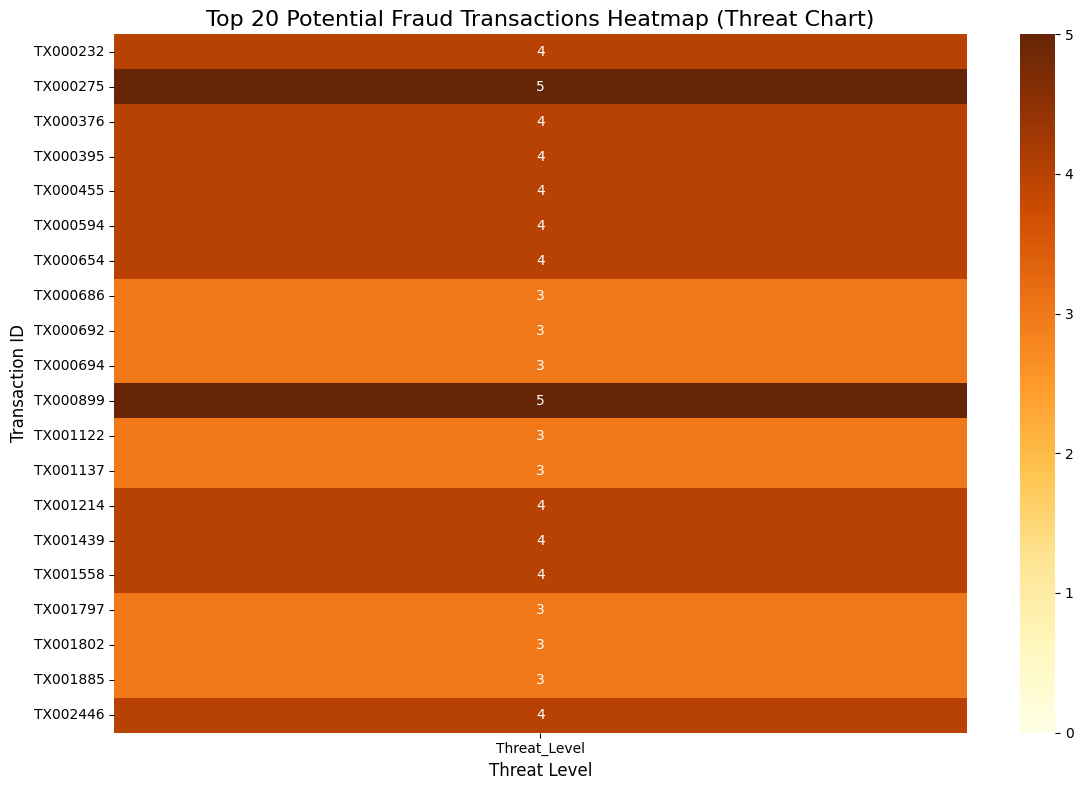

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top 20 rows
top_20_data = fr.head(20)

# Pivot table for heatmap
heatmap_data = top_20_data.pivot_table(
    index='TransactionID', 
    values='Threat_Level'
)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap="YlOrBr",
    vmin=0,
    vmax=5, 
    cbar=True
)

# Add labels and title
plt.title("Top 20 Potential Fraud Transactions Heatmap (Threat Chart)", fontsize=16)
plt.xlabel("Threat Level", fontsize=12)
plt.ylabel("Transaction ID", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# Conclusion
The fraud detection project successfully combines statistical and machine learning techniques to identify potential fraudulent transactions in a dataset of 2500 records. Through thorough data preprocessing and comprehensive analyses, five anomaly detection methods—K-Means Clustering, Z-Score Analysis, DBSCAN, Logistic Regression, and Isolation Forest—were implemented, each contributing unique insights. The results were consolidated into a ThreatLevel metric, enabling a prioritized view of high-risk transactions.

The project not only demonstrates effective detection but also emphasizes interpretability through detailed visualizations and color-coded threat charts. With scalability and practical applicability, this framework can serve as a robust foundation for real-world fraud detection systems in financial institutions.

Check 'Output' folder for each test result and 'potential_fraudulent_transactions.csv' for the list of suspicious transactions that are flagged

**Made by Daanish Muzaffar with <3**